In [1]:
import pandas as pd

rootpath = '/mnt/DADOS_PARIS_1/matheusp/csv_segunda_leva/'
df = pd.read_csv(rootpath+'new_dados_2.csv')
display(df)

df = df[['dt_cadastro', 'foto', 'fachada']]
display(df)

import os, shutil
dstpath = '/mnt/DADOS_PARIS_1/laranjeira/Datasets/ICM_facade'
if not os.path.isdir(dstpath): os.mkdir(dstpath)


# ## Create dataset formatted for pytorch 
    
# for clas in range(5):
#     claspath = os.path.join(dstpath, str(clas))
#     if not os.path.isdir(claspath): os.mkdir(claspath)

# for k in range(len(df)):
#     print(f'\r{k}/{len(df)}', flush=True, end='')
#     row = df.iloc[k]
#     foto = row.foto
#     fotopath = os.path.join(rootpath, foto)
#     if os.path.isfile(fotopath):
#         clas = row.fachada
#         savepath = os.path.join(dstpath, str(clas-1), '_'.join(foto.split('/')[-2:]))
#         shutil.copyfile(fotopath, savepath)

,Unnamed: 0,id_visita,id_municipio,id_area,id_censitario,id_quarteirao,dt_cadastro,agente,ordem,endereco,...,quintal,sombra_quintal,pav_quintal,telhado,recipiente,latitude,longitude,coordenadas,foto,id_tipo
0,0,192,252,4006,64468,666311,2021-09-20,Sandro,5,av Carlos lacerda,...,5,1,5,3,2,-22.939895,-47.107599,0101000020E610000086AC6EF59CF036C0890AD5CDC58D...,arquivos/20_09_2021/CEC7.tmp.jpg,2
1,1,193,252,4014,64725,667715,2021-09-20,Sandro,3,r Adauto ribeiro de melo,...,5,4,5,3,1,-22.947522,-47.094890,0101000020E6100000393AF8D390F236C0FFDAB05C258C...,arquivos/20_09_2021/CFE2.tmp.jpg,1
2,2,194,252,4014,64725,667715,2021-09-20,Sandro,4,r Adauto ribeiro de melo,...,5,3,1,3,1,-22.947474,-47.094866,0101000020E6100000A053909F8DF236C023410290248C...,arquivos/20_09_2021/D0DE.tmp.jpg,1
3,3,195,252,4006,64468,666311,2021-09-20,Sandro,2,r José dobner,...,5,4,5,3,1,-22.940534,-47.108536,0101000020E6100000D645C0D7C6F036C0E4767984E48D...,arquivos/20_09_2021/D10F.tmp.jpg,1
4,4,196,252,4014,64725,667715,2021-09-20,Sandro,5,r Adauto ribeiro de melo,...,5,1,5,3,1,-22.947661,-47.094996,0101000020E61000007CAE00F099F236C01BA034D4288C...,arquivos/20_09_2021/D120.tmp.jpg,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4166,4184,4459,252,3991,63949,663341,2022-04-14,Daniel Fernando,4,Gilman José Jorge Farah,...,3,1,5,3,1,-22.953758,-47.056025,0101000020E6100000DFC9028129F436C0A8209AD42B87...,arquivos/19_04_2022/2FB5.tmp.jpg,1
4167,4185,4674,252,4061,66083,680466,2022-04-28,sandro,1,rua Sergio Azevedo Penna chaves,...,4,3,4,3,1,-22.897801,-47.096812,0101000020E6100000C2D19F47D6E536C008AC1C5A648C...,arquivos/29_04_2022/614B.tmp.jpg,1
4168,4186,5403,252,5060,78963,657237,2022-05-27,Antônio Roberto corsetti,13,Viela Dois,...,2,3,4,2,1,-22.931097,-47.149417,0101000020E61000000669215C5CEE36C0CC7D72142093...,arquivos/24_06_2022/412B.tmp.jpg,1
4169,4187,5613,252,3963,63187,657599,2022-05-24,Daniel Fernando Moreira,1,Ana Burato Massaioli,...,4,3,5,3,1,-22.924711,-47.111977,0101000020E61000000C42D4D8B9EC36C07BB2AC45558E...,arquivos/24_06_2022/6D08.tmp.jpg,1


,dt_cadastro,foto,fachada
0,2021-09-20,arquivos/20_09_2021/CEC7.tmp.jpg,5
1,2021-09-20,arquivos/20_09_2021/CFE2.tmp.jpg,5
2,2021-09-20,arquivos/20_09_2021/D0DE.tmp.jpg,5
3,2021-09-20,arquivos/20_09_2021/D10F.tmp.jpg,5
4,2021-09-20,arquivos/20_09_2021/D120.tmp.jpg,5
...,...,...,...
4166,2022-04-14,arquivos/19_04_2022/2FB5.tmp.jpg,3
4167,2022-04-28,arquivos/29_04_2022/614B.tmp.jpg,4
4168,2022-05-27,arquivos/24_06_2022/412B.tmp.jpg,2
4169,2022-05-24,arquivos/24_06_2022/6D08.tmp.jpg,4


In [7]:
from torch.utils.data import DataLoader, WeightedRandomSampler, random_split
from torchvision import datasets, transforms, models
import torchvision.transforms.functional as TF
from torch import nn, optim
import torch
import numpy as np

class MyRotationTransform:
    """Rotate by one of the given angles."""

    def __init__(self, angles):
        self.angles = angles

    def __call__(self, x):
        angle = np.random.choice(self.angles, p=[0.1, 0.8, 0.1])
        return TF.rotate(x, int(angle))

rotation_transform = MyRotationTransform(angles=[-90, 0, 90])


mean = [0.485, 0.456, 0.406] 
std = [0.229, 0.224, 0.225]

data_transforms =  transforms.Compose([
    transforms.Resize(384),
    transforms.CenterCrop(384),
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomVerticalFlip(0.1),
#     transforms.RandomRotation(90),
    rotation_transform,
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])

dataset = datasets.ImageFolder(dstpath, transform=data_transforms)
train, val = random_split(dataset, [int(0.7*len(dataset)), int(0.3*len(dataset))] )

# labels = [sample[1] for sample in train] # DEMORAAAAA MUITOOO
# class_sample_count = np.asarray([len(os.listdir(dstpath+'/'+str(i))) for i in range(5)])
class_sample_count = np.asarray([ 144,  676, 1287, 1402,  551])
# weight = 1. / class_sample_count
# samples_weight = np.array([weight[l] for l in labels])
# samples_weight = torch.from_numpy(samples_weight)

In [107]:
dataset.imgs[0]

('/mnt/DADOS_PARIS_1/laranjeira/Datasets/ICM_facade/0/01_04_2022_1CBC.tmp.jpg',
 0)

In [3]:
# sampler = WeightedRandomSampler(samples_weight.type('torch.DoubleTensor'), len(samples_weight))
train_loader = DataLoader(train, 
#                           sampler=sampler,
                          shuffle=True,
                          batch_size=16,
                          num_workers=8,
                        )
val_loader = DataLoader(val, 
                        batch_size=8,
                        num_workers=8,
                        )


In [9]:
import torch.nn.functional as F
class FocalLoss(nn.CrossEntropyLoss):
    ''' Focal loss for classification tasks on imbalanced datasets '''

    def __init__(self, gamma, alpha=None, ignore_index=-100, reduction='none'):
        super().__init__(weight=alpha, ignore_index=ignore_index, reduction='none')
        self.reduction = reduction
        self.gamma = gamma

    def forward(self, input_, target):
        cross_entropy = super().forward(input_, target)
        # Temporarily mask out ignore index to '0' for valid gather-indices input.
        # This won't contribute final loss as the cross_entropy contribution
        # for these would be zero.
        target = target * (target != self.ignore_index).long()
        input_prob = torch.gather(F.softmax(input_, 1), 1, target.unsqueeze(1))
        loss = torch.pow(1 - input_prob, self.gamma) * cross_entropy
        return torch.mean(loss) if self.reduction == 'mean' \
               else torch.sum(loss) if self.reduction == 'sum' \
               else loss

In [10]:
num_classes = 5
# model = models.resnet152(pretrained=True) #EfficientNet_V2_S_Weights
# num_ftrs = model.fc.in_features
# model.fc = nn.Linear(num_ftrs, num_classes)

model = models.efficientnet_v2_s(pretrained=True)
num_ftrs = model.classifier[1].in_features
model.classifier = nn.Sequential(
                            nn.Dropout(p=0.2, inplace=True),
                            nn.Linear(in_features=num_ftrs, out_features=num_classes, bias=True))

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_V2_S_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_V2_S_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [14]:
gpu=0
device = torch.device("cuda:"+str(gpu) if torch.cuda.is_available() else "cpu")
model.to(device)

class_weights = torch.FloatTensor([4.7, 1.0, 0.54, 0.5, 1.2]).to(device) # 4.5, 1.0, 0.5, 0.5, 1.5
# class_weights = torch.FloatTensor(1-class_sample_count/sum(class_sample_count)).to(device)
# class_weights = torch.FloatTensor([1., 1., 1., 1., 1.]).to(device) #pesos com dados zooniverse
gamma = 2

criterion = FocalLoss(gamma=gamma, alpha = class_weights, reduction='mean').to(device)

optimizer = optim.Adam(model.parameters(), lr=1e-5, weight_decay=5e-5)

In [7]:
counts = np.asarray([102, 484, 892, 964, 400])
max(counts)/counts/2

array([4.7254902 , 0.99586777, 0.54035874, 0.5       , 1.205     ])

In [63]:
counts = np.asarray([102, 484, 892, 964, 400])
max(counts)/counts

array([9.45098039, 1.99173554, 1.08071749, 1.        , 2.41      ])

In [11]:
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, classification_report
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, top_k_accuracy_score
import sys
np.set_printoptions(threshold=sys.maxsize)

def calculate_metrics(preds, labels, score):
    preds, labels = np.asarray(preds), np.asarray(labels)
    score = np.asarray(score)
    
    cm = confusion_matrix(labels, preds)
    b_acc = balanced_accuracy_score(labels, preds)
    acc = accuracy_score(labels, preds)
    kappa = cohen_kappa_score(labels, preds)
    f1 = f1_score(labels, preds, average = 'weighted')  
    top2 = top_k_accuracy_score(labels, score, k=2)
    top3 = top_k_accuracy_score(labels, score, k=3)
    
    print ("\nAccuracy: " + str(acc))
    print ("Balanced_Accuracy: " + str(b_acc))
    print ("Kappa: " + str(kappa))
    print ("F1: " + str(f1))
    print ("Top-2: ", str(top2))
    print ("Top-3: ", str(top3))
    print (cm)
    print(classification_report(labels, preds))
    
    return b_acc

In [8]:
epochs = 51
best = {'val_pred': None, 'val_score': None, 'val_labels': None, 'loss': 0.0, 'epoch': 0}
min_val_loss = -1

# scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, threshold=1e-2)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5, verbose=True)


for ep in range(epochs):
    print('##############################################')
    print('Starting epoch ' + str(ep + 1) + '/' + str(epochs) + '...')

    # Setting model to training mode.
    print('    Training...', end='')
    model.train()
    losses, correct = [], 0.
    train_pred, train_score, train_labels = [], [], []
    for it, data in enumerate(train_loader):
        print(f'\r{it}/{len(train_loader)}', end='', flush=True)
        inps, labs = data
        
        inps = inps.to(device)
        labs = labs.to(device)

        optimizer.zero_grad()
        output = model(inps)
        _, preds = torch.max(output, 1)
        train_labels += labs.cpu().numpy().tolist()
        train_pred += output.max(1)[1].cpu().numpy().tolist()
        train_score += output.detach().cpu().numpy().tolist()
        correct += torch.sum(preds == labs.data)
        
        loss = criterion(output, labs)
        loss.backward() 
        optimizer.step()
        
        losses.append(loss.data.item())
        
    tr_loss = np.mean(losses)
    print(f'\nLoss: {np.mean(losses)}, Acc: {correct/len(train)}', )
    print(np.histogram(train_labels, bins=5))
    calculate_metrics(train_pred, train_labels, train_score)
    
    print('    Testing...')
    model.eval()
    losses, correct = [], 0.
    val_pred, val_score, val_labels = [], [], []
    with torch.no_grad():
        for it, data in enumerate(val_loader):
            inps, labs = data
        
            inps = inps.to(device)
            labs = labs.to(device)
            output = model(inps)
            _, preds = torch.max(output, 1)
            val_labels += labs.cpu().numpy().tolist()
            val_pred += output.max(1)[1].cpu().numpy().tolist()
            val_score += output.detach().cpu().numpy().tolist()
            correct += torch.sum(preds == labs.data)
            
            loss = criterion(output, labs)
            losses.append(loss.data.item()) 
                        
    print(f'Loss: {np.mean(losses)}, Acc: {correct/len(val)}', )
    print(np.histogram(val_labels, bins=5))
    
    scheduler.step()
    
    b_acc = calculate_metrics(val_pred, val_labels, val_score)
    
    
    if b_acc > min_val_loss:
        print('='*15, 'BEST', '='*15)
        best['val_pred']   = val_pred
        best['val_score']  = val_score
        best['val_labels'] = val_labels
        best['loss']  = np.mean(losses)
        best['epoch'] = ep

        min_val_loss = b_acc
        
        torch.save(model.state_dict(), 'best.pt')
    

Adjusting learning rate of group 0 to 1.0000e-05.
##############################################
Starting epoch 1/51...
177/178ining...
Loss: 0.9281719253304299, Acc: 0.3648838698863983
(array([ 96, 491, 910, 970, 375]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))

Accuracy: 0.3648838845883181
Balanced_Accuracy: 0.22814506783521
Kappa: 0.06255014080543253
F1: 0.30945954960745464
Top-2:  0.6703026038001407
Top-3:  0.8536242083040113
[[  0   9  56  31   0]
 [  2  30 321 137   1]
 [  2  33 514 353   8]
 [  0  15 460 489   6]
 [  0   8 175 188   4]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.32      0.06      0.10       491
           2       0.34      0.56      0.42       910
           3       0.41      0.50      0.45       970
           4       0.21      0.01      0.02       375

    accuracy                           0.36      2842
   macro avg       0.25      0.23      0.20      2842
weighted avg       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##############################################
Starting epoch 3/51...
177/178ining...
Loss: 0.8712379286128483, Acc: 0.4025334119796753
(array([ 96, 491, 910, 970, 375]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))

Accuracy: 0.40253342716396906
Balanced_Accuracy: 0.24784437238981086
Kappa: 0.11000938731624188
F1: 0.33255142258211906
Top-2:  0.6917663617171006
Top-3:  0.8849401829697396
[[  0   9  56  31   0]
 [  0  28 280 182   1]
 [  0  18 442 450   0]
 [  0   8 289 673   0]
 [  0   1 102 271   1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.44      0.06      0.10       491
           2       0.38      0.49      0.43       910
           3       0.42      0.69      0.52       970
           4       0.50      0.00      0.01       375

    accuracy                           0.40      2842
   macro avg       0.35      0.25      0.21      2842
weighted avg       0.41      0.40      0.33      2842

    Testin

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Loss: 0.8609698465447021, Acc: 0.3883415460586548
(array([ 48, 185, 377, 432, 176]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))
Adjusting learning rate of group 0 to 1.0000e-05.

Accuracy: 0.38834154351395733
Balanced_Accuracy: 0.2374653765171007
Kappa: 0.08586470664680046
F1: 0.3208818305128409
Top-2:  0.6970443349753694
Top-3:  0.8981937602627258
[[  0   8  26  14   0]
 [  0  11 124  50   0]
 [  0   6 173 198   0]
 [  0   4 139 289   0]
 [  0   1  45 130   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.37      0.06      0.10       185
           2       0.34      0.46      0.39       377
           3       0.42      0.67      0.52       432
           4       0.00      0.00      0.00       176

    accuracy                           0.39      1218
   macro avg       0.23      0.24      0.20      1218
weighted avg       0.31      0.39      0.32      1218

=============== BEST ===============


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##############################################
Starting epoch 4/51...
177/178ining...
Loss: 0.7983023839050465, Acc: 0.4408866763114929
(array([ 96, 491, 910, 970, 375]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))

Accuracy: 0.4408866995073892
Balanced_Accuracy: 0.28548804503494074
Kappa: 0.17768958921789857
F1: 0.3866557999852954
Top-2:  0.7241379310344828
Top-3:  0.8930330752990852
[[  0  30  44  22   0]
 [  0 102 254 135   0]
 [  1  46 487 376   0]
 [  0  24 282 664   0]
 [  0   8 101 266   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.49      0.21      0.29       491
           2       0.42      0.54      0.47       910
           3       0.45      0.68      0.55       970
           4       0.00      0.00      0.00       375

    accuracy                           0.44      2842
   macro avg       0.27      0.29      0.26      2842
weighted avg       0.37      0.44      0.39      2842

    Testing.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Loss: 0.804447790766074, Acc: 0.4236453175544739
(array([ 48, 185, 377, 432, 176]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))
Adjusting learning rate of group 0 to 1.0000e-05.

Accuracy: 0.4236453201970443
Balanced_Accuracy: 0.2816615156270329
Kappa: 0.15979446784801465
F1: 0.3738753694868418
Top-2:  0.7175697865353038
Top-3:  0.9055829228243021
[[  0  23  17   8   0]
 [  0  48 104  33   0]
 [  0  33 194 149   1]
 [  1  25 132 274   0]
 [  0   5  36 135   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.36      0.26      0.30       185
           2       0.40      0.51      0.45       377
           3       0.46      0.63      0.53       432
           4       0.00      0.00      0.00       176

    accuracy                           0.42      1218
   macro avg       0.24      0.28      0.26      1218
weighted avg       0.34      0.42      0.37      1218

=============== BEST ===============
#############

##############################################
Starting epoch 9/51...
177/178ining...
Loss: 0.47957148260614846, Acc: 0.5598170161247253
(array([ 96, 491, 910, 970, 375]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))

Accuracy: 0.55981703026038
Balanced_Accuracy: 0.5060069119918511
Kappa: 0.38792241772006764
F1: 0.5519969622566666
Top-2:  0.8149190710767066
Top-3:  0.9433497536945813
[[ 42  39   5   8   2]
 [ 17 278 139  54   3]
 [ 18 123 483 259  27]
 [ 11  35 179 676  69]
 [  4   6  42 211 112]]
              precision    recall  f1-score   support

           0       0.46      0.44      0.45        96
           1       0.58      0.57      0.57       491
           2       0.57      0.53      0.55       910
           3       0.56      0.70      0.62       970
           4       0.53      0.30      0.38       375

    accuracy                           0.56      2842
   macro avg       0.54      0.51      0.51      2842
weighted avg       0.56      0.56      0.55      2842

    Testing...

Loss: 1.1129549962827583, Acc: 0.44991791248321533
(array([ 48, 185, 377, 432, 176]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))
Adjusting learning rate of group 0 to 5.0000e-06.

Accuracy: 0.44991789819376027
Balanced_Accuracy: 0.4246203081547909
Kappa: 0.25383888127949916
F1: 0.4500338831698474
Top-2:  0.7676518883415435
Top-3:  0.9211822660098522
[[ 16  21   5   4   2]
 [ 22  93  48  22   0]
 [ 14  61 154 133  15]
 [ 12  26  86 220  88]
 [  1   4  20  86  65]]
              precision    recall  f1-score   support

           0       0.25      0.33      0.28        48
           1       0.45      0.50      0.48       185
           2       0.49      0.41      0.45       377
           3       0.47      0.51      0.49       432
           4       0.38      0.37      0.38       176

    accuracy                           0.45      1218
   macro avg       0.41      0.42      0.41      1218
weighted avg       0.45      0.45      0.45      1218

##############################################


177/178ining...
Loss: 0.2834378089127916, Acc: 0.6555242538452148
(array([ 96, 491, 910, 970, 375]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))

Accuracy: 0.655524278676988
Balanced_Accuracy: 0.653116196764371
Kappa: 0.5266390758165393
F1: 0.653483624837796
Top-2:  0.8877551020408163
Top-3:  0.9662209711470795
[[ 72  15   4   1   4]
 [ 17 324 120  25   5]
 [ 11 105 575 194  25]
 [  5  27 141 706  91]
 [  2   2  34 151 186]]
              precision    recall  f1-score   support

           0       0.67      0.75      0.71        96
           1       0.68      0.66      0.67       491
           2       0.66      0.63      0.64       910
           3       0.66      0.73      0.69       970
           4       0.60      0.50      0.54       375

    accuracy                           0.66      2842
   macro avg       0.65      0.65      0.65      2842
weighted avg       0.65      0.66      0.65      2842

    Testing...
Loss: 0.6066665628961488, Acc: 0.4490968883037567
(array([ 48, 185, 377,

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
calculate_metrics(best['val_pred'], best['val_labels'], best['val_score'])


Accuracy: 0.4433497536945813
Balanced_Accuracy: 0.44496765936421107
Kappa: 0.24956312572074024
F1: 0.44432521785699125
Top-2:  0.7586206896551724
Top-3:  0.9285714285714286
[[ 21  16   4   4   3]
 [ 18  94  50  22   1]
 [ 11  61 147 133  25]
 [ 10  16  87 205 114]
 [  3   3  15  82  73]]
              precision    recall  f1-score   support

           0       0.33      0.44      0.38        48
           1       0.49      0.51      0.50       185
           2       0.49      0.39      0.43       377
           3       0.46      0.47      0.47       432
           4       0.34      0.41      0.37       176

    accuracy                           0.44      1218
   macro avg       0.42      0.44      0.43      1218
weighted avg       0.45      0.44      0.44      1218



0.44496765936421107

## K-FOLD

In [41]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True)
folds = {'train': [], 'test': []}

for fold, (train_ids, test_ids) in enumerate(kfold.split(dataset)):
    
    folds['train'].append(train_ids)
    folds['test'].append(test_ids)
    
    # Print
    print('-'*25, f'FOLD {fold}', '-'*25)
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    train_loader = torch.utils.data.DataLoader(
                      dataset, 
                      batch_size=16, sampler=train_subsampler)
    val_loader = torch.utils.data.DataLoader(
                      dataset,
                      batch_size=16, sampler=test_subsampler)
    
    
    model = models.efficientnet_v2_s(pretrained=True)
    num_ftrs = model.classifier[1].in_features
    model.classifier = nn.Sequential(
                                nn.Dropout(p=0.2, inplace=True),
                                nn.Linear(in_features=num_ftrs, out_features=5, bias=True))
    
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)

    class_weights = torch.FloatTensor([4.7, 1.0, 0.54, 0.5, 1.2]).to(device) # 4.5, 1.0, 0.5, 0.5, 1.5
    gamma = 2

    criterion = FocalLoss(gamma=gamma, alpha = class_weights, reduction='mean').to(device)
    optimizer = optim.Adam(model.parameters(), lr=1e-5, weight_decay=5e-5)
    
    epochs = 51
    best = {'epoch': 0, 'loss': 0.0, 'val_pred': None, 'val_score': None, 'val_labels': None}
    min_val_loss = -1

    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5, verbose=True)

    for ep in range(epochs):
        print('##############################################')
        print('Starting epoch ' + str(ep + 1) + '/' + str(epochs) + '...')

        # Setting model to training mode.
        print('    Training...', end='')
        model.train()
        losses, correct = [], 0.
        train_pred, train_score, train_labels = [], [], []
        for it, data in enumerate(train_loader):
            print(f'\r{it}/{len(train_loader)}', end='', flush=True)
            inps, labs = data

            inps = inps.to(device)
            labs = labs.to(device)

            optimizer.zero_grad()
            output = model(inps)
            _, preds = torch.max(output, 1)
            train_labels += labs.cpu().numpy().tolist()
            train_pred += output.max(1)[1].cpu().numpy().tolist()
            train_score += output.detach().cpu().numpy().tolist()
            correct += torch.sum(preds == labs.data)

            loss = criterion(output, labs)
            loss.backward() 
            optimizer.step()

            losses.append(loss.data.item())

        tr_loss = np.mean(losses)
        print(f'\nLoss: {np.mean(losses)}, Acc: {correct/len(train)}', )
        print(np.histogram(train_labels, bins=5))
        calculate_metrics(train_pred, train_labels, train_score)
    
        print('    Testing...')
        model.eval()
        losses, correct = [], 0.
        val_pred, val_score, val_labels = [], [], []
        with torch.no_grad():
            for it, data in enumerate(val_loader):
                inps, labs = data

                inps = inps.to(device)
                labs = labs.to(device)
                output = model(inps)
                _, preds = torch.max(output, 1)
                val_labels += labs.cpu().numpy().tolist()
                val_pred += output.max(1)[1].cpu().numpy().tolist()
                val_score += output.detach().cpu().numpy().tolist()
                correct += torch.sum(preds == labs.data)

                loss = criterion(output, labs)
                losses.append(loss.data.item()) 

        print(f'Loss: {np.mean(losses)}, Acc: {correct/len(val)}', )
        print(np.histogram(val_labels, bins=5))

        scheduler.step()

        b_acc = calculate_metrics(val_pred, val_labels, val_score)


        if b_acc > min_val_loss:
            print('='*15, 'BEST', '='*15)
            best['val_pred']   = val_pred
            best['val_score']  = val_score
            best['val_labels'] = val_labels
            best['loss']  = np.mean(losses)
            best['epoch'] = ep

            min_val_loss = b_acc
            torch.save(model.state_dict(), f'best_fold0{fold+1}.pt')

------------------------- FOLD 0 -------------------------


/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_V2_S_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_V2_S_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Adjusting learning rate of group 0 to 1.0000e-05.
##############################################
Starting epoch 1/51...
202/203ining...
Loss: 1.000567722496728, Acc: 0.31386345624923706
(array([ 113,  533, 1020, 1139,  443]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))

Accuracy: 0.2746305418719212
Balanced_Accuracy: 0.197537432940072
Kappa: -0.006565580698871143
F1: 0.23548223005862062
Top-2:  0.5144704433497537
Top-3:  0.7404556650246306
[[  2  16  68  22   5]
 [ 12  79 326  82  34]
 [ 10 171 627 142  70]
 [ 20 172 715 151  81]
 [  7  62 296  45  33]]
              precision    recall  f1-score   support

           0       0.04      0.02      0.02       113
           1       0.16      0.15      0.15       533
           2       0.31      0.61      0.41      1020
           3       0.34      0.13      0.19      1139
           4       0.15      0.07      0.10       443

    accuracy                           0.27      3248
   macro avg       0.20      0.20      0.18      3248
weighted av

Loss: 0.9470707668977625, Acc: 0.28735631704330444
(array([ 31, 143, 267, 263, 108]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))
Adjusting learning rate of group 0 to 1.0000e-05.

Accuracy: 0.43103448275862066
Balanced_Accuracy: 0.3458687585300523
Kappa: 0.21386256048315277
F1: 0.4166237424271204
Top-2:  0.7389162561576355
Top-3:  0.9100985221674877
[[  1  23   2   4   1]
 [  0  75  45  20   3]
 [  0  57  99 102   9]
 [  4  22  68 150  19]
 [  1   7  10  65  25]]
              precision    recall  f1-score   support

           0       0.17      0.03      0.05        31
           1       0.41      0.52      0.46       143
           2       0.44      0.37      0.40       267
           3       0.44      0.57      0.50       263
           4       0.44      0.23      0.30       108

    accuracy                           0.43       812
   macro avg       0.38      0.35      0.34       812
weighted avg       0.42      0.43      0.42       812

=============== BEST ===============
##########

202/203ining...
Loss: 0.4112715659470394, Acc: 0.6593948006629944
(array([ 113,  533, 1020, 1139,  443]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))

Accuracy: 0.5769704433497537
Balanced_Accuracy: 0.532815919766841
Kappa: 0.41556577699301767
F1: 0.5749633050699613
Top-2:  0.8405172413793104
Top-3:  0.9565886699507389
[[ 49  43   7   8   6]
 [ 24 293 166  46   4]
 [ 15 131 584 269  21]
 [ 16  35 221 748 119]
 [  7   5  41 190 200]]
              precision    recall  f1-score   support

           0       0.44      0.43      0.44       113
           1       0.58      0.55      0.56       533
           2       0.57      0.57      0.57      1020
           3       0.59      0.66      0.62      1139
           4       0.57      0.45      0.50       443

    accuracy                           0.58      3248
   macro avg       0.55      0.53      0.54      3248
weighted avg       0.58      0.58      0.57      3248

    Testing...
Loss: 0.5975301552052591, Acc: 0.30049261450767517
(array([ 31, 

Loss: 0.5926260726124633, Acc: 0.2889983654022217
(array([ 31, 143, 267, 263, 108]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))
Adjusting learning rate of group 0 to 5.0000e-06.

Accuracy: 0.43349753694581283
Balanced_Accuracy: 0.4212769850508492
Kappa: 0.24171000970396816
F1: 0.4370737594087529
Top-2:  0.7573891625615764
Top-3:  0.9236453201970444
[[ 12  13   2   4   0]
 [ 20  57  46  17   3]
 [ 11  43 112  82  19]
 [ 13   5  62 125  58]
 [  4   1  12  45  46]]
              precision    recall  f1-score   support

           0       0.20      0.39      0.26        31
           1       0.48      0.40      0.44       143
           2       0.48      0.42      0.45       267
           3       0.46      0.48      0.47       263
           4       0.37      0.43      0.39       108

    accuracy                           0.43       812
   macro avg       0.40      0.42      0.40       812
weighted avg       0.45      0.43      0.44       812

=============== BEST ===============
###########

202/203ining...
Loss: 0.23282580527252164, Acc: 0.7938071489334106
(array([ 113,  533, 1020, 1139,  443]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))

Accuracy: 0.6945812807881774
Balanced_Accuracy: 0.6915534345578498
Kappa: 0.5829021272144783
F1: 0.6943807774789005
Top-2:  0.9070197044334976
Top-3:  0.979064039408867
[[ 78  18  10   4   3]
 [ 24 368 108  30   3]
 [ 17 116 670 196  21]
 [  8  20 163 836 112]
 [  3   3  15 118 304]]
              precision    recall  f1-score   support

           0       0.60      0.69      0.64       113
           1       0.70      0.69      0.70       533
           2       0.69      0.66      0.67      1020
           3       0.71      0.73      0.72      1139
           4       0.69      0.69      0.69       443

    accuracy                           0.69      3248
   macro avg       0.68      0.69      0.68      3248
weighted avg       0.69      0.69      0.69      3248

    Testing...
Loss: 0.6433666745821635, Acc: 0.29474547505378723
(array([ 31, 

Loss: 0.6548124738768035, Acc: 0.2980295717716217
(array([ 31, 143, 267, 263, 108]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))
Adjusting learning rate of group 0 to 2.5000e-06.

Accuracy: 0.44704433497536944
Balanced_Accuracy: 0.4352989828816608
Kappa: 0.25576819049368726
F1: 0.44904728826033374
Top-2:  0.7586206896551724
Top-3:  0.9261083743842364
[[ 13  10   6   1   1]
 [ 17  57  54  12   3]
 [  9  38 115  73  32]
 [  8   8  66 132  49]
 [  1   1  15  45  46]]
              precision    recall  f1-score   support

           0       0.27      0.42      0.33        31
           1       0.50      0.40      0.44       143
           2       0.45      0.43      0.44       267
           3       0.50      0.50      0.50       263
           4       0.35      0.43      0.38       108

    accuracy                           0.45       812
   macro avg       0.41      0.44      0.42       812
weighted avg       0.46      0.45      0.45       812

=============== BEST ===============
##########

202/203ining...
Loss: 0.16637604252384802, Acc: 0.859254002571106
(array([ 113,  533, 1020, 1139,  443]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))

Accuracy: 0.7518472906403941
Balanced_Accuracy: 0.7641953939367938
Kappa: 0.6605020556844542
F1: 0.7517158458500475
Top-2:  0.9279556650246306
Top-3:  0.9836822660098522
[[ 95  13   2   0   3]
 [ 20 394  95  21   3]
 [  5  83 749 170  13]
 [  5  22 150 878  84]
 [  2   1  23  91 326]]
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       113
           1       0.77      0.74      0.75       533
           2       0.74      0.73      0.73      1020
           3       0.76      0.77      0.76      1139
           4       0.76      0.74      0.75       443

    accuracy                           0.75      3248
   macro avg       0.75      0.76      0.76      3248
weighted avg       0.75      0.75      0.75      3248

    Testing...
Loss: 0.7084414783646079, Acc: 0.29146140813827515
(array([ 31, 

Loss: 0.7012059441676327, Acc: 0.29474547505378723
(array([ 31, 143, 267, 263, 108]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))
Adjusting learning rate of group 0 to 1.2500e-06.

Accuracy: 0.4421182266009852
Balanced_Accuracy: 0.43780417663519905
Kappa: 0.2501712328767124
F1: 0.4437544023912865
Top-2:  0.75
Top-3:  0.9137931034482759
[[ 13  11   4   2   1]
 [ 12  64  48  16   3]
 [  7  49 116  68  27]
 [  8   7  75 119  54]
 [  1   1  17  42  47]]
              precision    recall  f1-score   support

           0       0.32      0.42      0.36        31
           1       0.48      0.45      0.47       143
           2       0.45      0.43      0.44       267
           3       0.48      0.45      0.47       263
           4       0.36      0.44      0.39       108

    accuracy                           0.44       812
   macro avg       0.42      0.44      0.43       812
weighted avg       0.45      0.44      0.44       812

=============== BEST ===============
#########################

202/203ining...
Loss: 0.14043530244655503, Acc: 0.883532702922821
(array([ 113,  533, 1020, 1139,  443]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))

Accuracy: 0.7730911330049262
Balanced_Accuracy: 0.7884799412102241
Kappa: 0.6909150609596035
F1: 0.7732121372451373
Top-2:  0.9408866995073891
Top-3:  0.9827586206896551
[[ 99   8   2   1   3]
 [ 22 397  89  19   6]
 [ 11  71 787 129  22]
 [  9  19 132 886  93]
 [  2   2  19  78 342]]
              precision    recall  f1-score   support

           0       0.69      0.88      0.77       113
           1       0.80      0.74      0.77       533
           2       0.76      0.77      0.77      1020
           3       0.80      0.78      0.79      1139
           4       0.73      0.77      0.75       443

    accuracy                           0.77      3248
   macro avg       0.76      0.79      0.77      3248
weighted avg       0.77      0.77      0.77      3248

    Testing...
Loss: 0.71820854381019, Acc: 0.2775041162967682
(array([ 31, 143

Loss: 0.7551750996533562, Acc: 0.27996715903282166
(array([ 31, 143, 267, 263, 108]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))
Adjusting learning rate of group 0 to 6.2500e-07.

Accuracy: 0.41995073891625617
Balanced_Accuracy: 0.400200365576797
Kappa: 0.22158742822949462
F1: 0.42121736827453854
Top-2:  0.7475369458128078
Top-3:  0.9051724137931034
[[  9  11   6   3   2]
 [ 14  62  43  20   4]
 [  4  52 105  78  28]
 [  9  13  67 118  56]
 [  1   1  20  39  47]]
              precision    recall  f1-score   support

           0       0.24      0.29      0.26        31
           1       0.45      0.43      0.44       143
           2       0.44      0.39      0.41       267
           3       0.46      0.45      0.45       263
           4       0.34      0.44      0.38       108

    accuracy                           0.42       812
   macro avg       0.39      0.40      0.39       812
weighted avg       0.42      0.42      0.42       812

##############################################


202/203ining...
Loss: 0.12303175983647702, Acc: 0.8972554206848145
(array([ 113,  533, 1020, 1139,  443]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))

Accuracy: 0.7850985221674877
Balanced_Accuracy: 0.7984642891367887
Kappa: 0.7061932071408752
F1: 0.7848872262250299
Top-2:  0.9501231527093597
Top-3:  0.9879926108374384
[[101   8   2   0   2]
 [ 15 406  92  16   4]
 [  3  85 791 124  17]
 [  3  23 122 917  74]
 [  3   0  10  95 335]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       113
           1       0.78      0.76      0.77       533
           2       0.78      0.78      0.78      1020
           3       0.80      0.81      0.80      1139
           4       0.78      0.76      0.77       443

    accuracy                           0.79      3248
   macro avg       0.79      0.80      0.79      3248
weighted avg       0.78      0.79      0.78      3248

    Testing...
Loss: 0.7646565419786117, Acc: 0.2898193895816803
(array([ 31, 

Loss: 0.7396156758654351, Acc: 0.29064038395881653
(array([ 31, 143, 267, 263, 108]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))
Adjusting learning rate of group 0 to 3.1250e-07.

Accuracy: 0.43596059113300495
Balanced_Accuracy: 0.38864327887228395
Kappa: 0.23461495717172887
F1: 0.436080994092632
Top-2:  0.7610837438423645
Top-3:  0.916256157635468
[[  7  15   4   3   2]
 [ 13  55  52  22   1]
 [  2  42 117  75  31]
 [  7   7  66 133  50]
 [  2   1  15  48  42]]
              precision    recall  f1-score   support

           0       0.23      0.23      0.23        31
           1       0.46      0.38      0.42       143
           2       0.46      0.44      0.45       267
           3       0.47      0.51      0.49       263
           4       0.33      0.39      0.36       108

    accuracy                           0.44       812
   macro avg       0.39      0.39      0.39       812
weighted avg       0.44      0.44      0.44       812

##############################################
S

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_V2_S_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_V2_S_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Adjusting learning rate of group 0 to 1.0000e-05.
##############################################
Starting epoch 1/51...
202/203ining...
Loss: 0.9962796548317219, Acc: 0.3240675628185272
(array([ 108,  557, 1041, 1092,  450]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))

Accuracy: 0.2835591133004926
Balanced_Accuracy: 0.21085571428421918
Kappa: 0.010150218732020821
F1: 0.27034217473564465
Top-2:  0.5341748768472906
Top-3:  0.7272167487684729
[[ 11  26  39  30   2]
 [ 47 105 180 215  10]
 [ 69 177 363 401  31]
 [ 68 177 387 434  26]
 [ 32  80 165 165   8]]
              precision    recall  f1-score   support

           0       0.05      0.10      0.07       108
           1       0.19      0.19      0.19       557
           2       0.32      0.35      0.33      1041
           3       0.35      0.40      0.37      1092
           4       0.10      0.02      0.03       450

    accuracy                           0.28      3248
   macro avg       0.20      0.21      0.20      3248
weighted a

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##############################################
Starting epoch 3/51...
202/203ining...
Loss: 0.8346651167117903, Acc: 0.46727654337882996
(array([ 108,  557, 1041, 1092,  450]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))

Accuracy: 0.4088669950738916
Balanced_Accuracy: 0.2812400660500558
Kappa: 0.14515466189924875
F1: 0.36940628438759976
Top-2:  0.7145935960591133
Top-3:  0.8977832512315271
[[  1  37  46  24   0]
 [  0 162 225 167   3]
 [  2 116 438 479   6]
 [  3  55 311 712  11]
 [  0  17  97 321  15]]
              precision    recall  f1-score   support

           0       0.17      0.01      0.02       108
           1       0.42      0.29      0.34       557
           2       0.39      0.42      0.41      1041
           3       0.42      0.65      0.51      1092
           4       0.43      0.03      0.06       450

    accuracy                           0.41      3248
   macro avg       0.36      0.28      0.27      3248
weighted avg       0.40      0.41      0.37      3248

    Te

Loss: 0.5916298581104652, Acc: 0.31527093052864075
(array([ 36, 119, 246, 310, 101]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))
Adjusting learning rate of group 0 to 1.0000e-05.

Accuracy: 0.4729064039408867
Balanced_Accuracy: 0.4085824325809397
Kappa: 0.2694126896702502
F1: 0.46581243449866105
Top-2:  0.7770935960591133
Top-3:  0.9310344827586207
[[  5  23   3   3   2]
 [  4  69  31  15   0]
 [  4  42  92  91  17]
 [  4  14  61 181  50]
 [  0   2  10  52  37]]
              precision    recall  f1-score   support

           0       0.29      0.14      0.19        36
           1       0.46      0.58      0.51       119
           2       0.47      0.37      0.42       246
           3       0.53      0.58      0.56       310
           4       0.35      0.37      0.36       101

    accuracy                           0.47       812
   macro avg       0.42      0.41      0.41       812
weighted avg       0.47      0.47      0.47       812

=============== BEST ===============
###########

##############################################
Starting epoch 12/51...
202/203ining...
Loss: 0.35981540403929835, Acc: 0.697044312953949
(array([ 108,  557, 1041, 1092,  450]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))

Accuracy: 0.6099137931034483
Balanced_Accuracy: 0.5918323621844438
Kappa: 0.46614658365368267
F1: 0.6091574937293509
Top-2:  0.8651477832512315
Top-3:  0.9596674876847291
[[ 63  29   9   4   3]
 [ 22 330 158  38   9]
 [ 17 132 639 219  34]
 [  6  29 207 719 131]
 [  4   5  35 176 230]]
              precision    recall  f1-score   support

           0       0.56      0.58      0.57       108
           1       0.63      0.59      0.61       557
           2       0.61      0.61      0.61      1041
           3       0.62      0.66      0.64      1092
           4       0.57      0.51      0.54       450

    accuracy                           0.61      3248
   macro avg       0.60      0.59      0.59      3248
weighted avg       0.61      0.61      0.61      3248

    Tes

Loss: 0.5532193996158301, Acc: 0.31116583943367004
(array([ 36, 119, 246, 310, 101]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))
Adjusting learning rate of group 0 to 5.0000e-06.

Accuracy: 0.4667487684729064
Balanced_Accuracy: 0.4580273466390864
Kappa: 0.27725633846824294
F1: 0.4675760266665738
Top-2:  0.791871921182266
Top-3:  0.9285714285714286
[[ 12  15   4   2   3]
 [  5  67  27  20   0]
 [  8  40 102  75  21]
 [  2  14  73 147  74]
 [  0   1  15  34  51]]
              precision    recall  f1-score   support

           0       0.44      0.33      0.38        36
           1       0.49      0.56      0.52       119
           2       0.46      0.41      0.44       246
           3       0.53      0.47      0.50       310
           4       0.34      0.50      0.41       101

    accuracy                           0.47       812
   macro avg       0.45      0.46      0.45       812
weighted avg       0.48      0.47      0.47       812

=============== BEST ===============
############

202/203ining...
Loss: 0.22687902883282435, Acc: 0.7923997044563293
(array([ 108,  557, 1041, 1092,  450]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))

Accuracy: 0.6933497536945813
Balanced_Accuracy: 0.6944726118442663
Kappa: 0.5817574289587337
F1: 0.6928240211635958
Top-2:  0.9057881773399015
Top-3:  0.979371921182266
[[ 85  15   5   0   3]
 [ 39 349 133  30   6]
 [ 13  98 743 160  27]
 [  7  20 150 799 116]
 [  2   3  31 138 276]]
              precision    recall  f1-score   support

           0       0.58      0.79      0.67       108
           1       0.72      0.63      0.67       557
           2       0.70      0.71      0.71      1041
           3       0.71      0.73      0.72      1092
           4       0.64      0.61      0.63       450

    accuracy                           0.69      3248
   macro avg       0.67      0.69      0.68      3248
weighted avg       0.69      0.69      0.69      3248

    Testing...
Loss: 0.5514466546329797, Acc: 0.32019704580307007
(array([ 36, 

Loss: 0.5904150827258241, Acc: 0.29638752341270447
(array([ 36, 119, 246, 310, 101]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))
Adjusting learning rate of group 0 to 2.5000e-06.

Accuracy: 0.4445812807881773
Balanced_Accuracy: 0.42732073363370426
Kappa: 0.24697008952989608
F1: 0.4449171875079811
Top-2:  0.7758620689655172
Top-3:  0.9396551724137931
[[ 10  18   4   3   1]
 [  8  69  31   9   2]
 [  7  44 106  69  20]
 [  4  14  96 134  62]
 [  0   2  15  42  42]]
              precision    recall  f1-score   support

           0       0.34      0.28      0.31        36
           1       0.47      0.58      0.52       119
           2       0.42      0.43      0.43       246
           3       0.52      0.43      0.47       310
           4       0.33      0.42      0.37       101

    accuracy                           0.44       812
   macro avg       0.42      0.43      0.42       812
weighted avg       0.45      0.44      0.44       812

##############################################


202/203ining...
Loss: 0.18706155953736142, Acc: 0.8349753618240356
(array([ 108,  557, 1041, 1092,  450]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))

Accuracy: 0.7306034482758621
Balanced_Accuracy: 0.732754304638555
Kappa: 0.6329213493304884
F1: 0.730497598118014
Top-2:  0.9214901477832512
Top-3:  0.9802955665024631
[[ 85  14   5   2   2]
 [ 14 380 131  26   6]
 [ 13  99 767 131  31]
 [  7  15 146 825  99]
 [  3   3  22 106 316]]
              precision    recall  f1-score   support

           0       0.70      0.79      0.74       108
           1       0.74      0.68      0.71       557
           2       0.72      0.74      0.73      1041
           3       0.76      0.76      0.76      1092
           4       0.70      0.70      0.70       450

    accuracy                           0.73      3248
   macro avg       0.72      0.73      0.73      3248
weighted avg       0.73      0.73      0.73      3248

    Testing...
Loss: 0.6049890357489679, Acc: 0.29474547505378723
(array([ 36, 1

Loss: 0.6344068628900191, Acc: 0.29967159032821655
(array([ 36, 119, 246, 310, 101]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))
Adjusting learning rate of group 0 to 1.2500e-06.

Accuracy: 0.44950738916256155
Balanced_Accuracy: 0.4352632488288333
Kappa: 0.26149526435191306
F1: 0.451142259676696
Top-2:  0.7832512315270936
Top-3:  0.9433497536945813
[[  9  18   4   2   3]
 [  7  67  34  10   1]
 [  7  46 100  63  30]
 [  2  13  81 137  77]
 [  1   2  12  34  52]]
              precision    recall  f1-score   support

           0       0.35      0.25      0.29        36
           1       0.46      0.56      0.51       119
           2       0.43      0.41      0.42       246
           3       0.56      0.44      0.49       310
           4       0.32      0.51      0.39       101

    accuracy                           0.45       812
   macro avg       0.42      0.44      0.42       812
weighted avg       0.47      0.45      0.45       812

##############################################
S

202/203ining...
Loss: 0.15706452026761372, Acc: 0.8694580793380737
(array([ 108,  557, 1041, 1092,  450]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))

Accuracy: 0.7607758620689655
Balanced_Accuracy: 0.7749659864306566
Kappa: 0.6743534867084346
F1: 0.7604275722293012
Top-2:  0.9365763546798029
Top-3:  0.9815270935960592
[[ 96   6   1   1   4]
 [ 21 391 111  28   6]
 [  4  95 802 118  22]
 [  6  17 128 852  89]
 [  4   4  21  91 330]]
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       108
           1       0.76      0.70      0.73       557
           2       0.75      0.77      0.76      1041
           3       0.78      0.78      0.78      1092
           4       0.73      0.73      0.73       450

    accuracy                           0.76      3248
   macro avg       0.75      0.77      0.76      3248
weighted avg       0.76      0.76      0.76      3248

    Testing...
Loss: 0.6384312734007835, Acc: 0.30788177251815796
(array([ 36,

Loss: 0.6320901066064835, Acc: 0.3054187297821045
(array([ 36, 119, 246, 310, 101]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))
Adjusting learning rate of group 0 to 6.2500e-07.

Accuracy: 0.458128078817734
Balanced_Accuracy: 0.43629093337303504
Kappa: 0.26327488828906487
F1: 0.46159385871321246
Top-2:  0.7820197044334976
Top-3:  0.9408866995073891
[[ 11  15   4   2   4]
 [  4  58  43  13   1]
 [  6  34 116  62  28]
 [  3   8  87 140  72]
 [  0   0  16  38  47]]
              precision    recall  f1-score   support

           0       0.46      0.31      0.37        36
           1       0.50      0.49      0.50       119
           2       0.44      0.47      0.45       246
           3       0.55      0.45      0.50       310
           4       0.31      0.47      0.37       101

    accuracy                           0.46       812
   macro avg       0.45      0.44      0.44       812
weighted avg       0.47      0.46      0.46       812

##############################################
S

202/203ining...
Loss: 0.1433526029617622, Acc: 0.8775510191917419
(array([ 108,  557, 1041, 1092,  450]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))

Accuracy: 0.7678571428571429
Balanced_Accuracy: 0.7744438363454604
Kappa: 0.6847187344627881
F1: 0.7678604925285085
Top-2:  0.938115763546798
Top-3:  0.9889162561576355
[[ 88  14   2   1   3]
 [ 18 435  83  18   3]
 [ 10  95 783 134  19]
 [  5  17 119 854  97]
 [  1   2  12 101 334]]
              precision    recall  f1-score   support

           0       0.72      0.81      0.77       108
           1       0.77      0.78      0.78       557
           2       0.78      0.75      0.77      1041
           3       0.77      0.78      0.78      1092
           4       0.73      0.74      0.74       450

    accuracy                           0.77      3248
   macro avg       0.76      0.77      0.76      3248
weighted avg       0.77      0.77      0.77      3248

    Testing...
Loss: 0.6552394324657964, Acc: 0.28817734122276306
(array([ 36, 1

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_V2_S_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_V2_S_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Adjusting learning rate of group 0 to 1.0000e-05.
##############################################
Starting epoch 1/51...
202/203ining...
Loss: 1.0146708159611142, Acc: 0.2719915509223938
(array([ 120,  543, 1022, 1132,  431]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))

Accuracy: 0.23799261083743842
Balanced_Accuracy: 0.2157216952021616
Kappa: 0.021007397368844827
F1: 0.23511859547640201
Top-2:  0.4630541871921182
Top-3:  0.6687192118226601
[[ 11  53  14  32  10]
 [ 55 246  85 115  42]
 [101 407 126 279 109]
 [100 408 136 344 144]
 [ 28 157  51 149  46]]
              precision    recall  f1-score   support

           0       0.04      0.09      0.05       120
           1       0.19      0.45      0.27       543
           2       0.31      0.12      0.18      1022
           3       0.37      0.30      0.34      1132
           4       0.13      0.11      0.12       431

    accuracy                           0.24      3248
   macro avg       0.21      0.22      0.19      3248
weighted a

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


202/203
Loss: 0.8263710528758946, Acc: 0.4919070899486542
(array([ 120,  543, 1022, 1132,  431]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))

Accuracy: 0.4304187192118227
Balanced_Accuracy: 0.28561645210533865
Kappa: 0.1600640715337791
F1: 0.3784084139165298
Top-2:  0.7198275862068966
Top-3:  0.9067118226600985
[[  2  40  37  41   0]
 [  0 142 223 177   1]
 [  1  52 428 541   0]
 [  0  34 273 825   0]
 [  0   9  71 350   1]]
              precision    recall  f1-score   support

           0       0.67      0.02      0.03       120
           1       0.51      0.26      0.35       543
           2       0.41      0.42      0.42      1022
           3       0.43      0.73      0.54      1132
           4       0.50      0.00      0.00       431

    accuracy                           0.43      3248
   macro avg       0.50      0.29      0.27      3248
weighted avg       0.46      0.43      0.38      3248

    Testing...
Loss: 0.7998945257242989, Acc: 0.27996715903282166
(array([ 24, 133, 26

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##############################################
Starting epoch 4/51...
202/203ining...
Loss: 0.7228943563153591, Acc: 0.5161857604980469
(array([ 120,  543, 1022, 1132,  431]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))

Accuracy: 0.4516625615763547
Balanced_Accuracy: 0.329157066281493
Kappa: 0.20964673744114226
F1: 0.4067129661151332
Top-2:  0.7583128078817734
Top-3:  0.915948275862069
[[  8  67  20  25   0]
 [  2 259 150 131   1]
 [  2 150 382 485   3]
 [  2  66 243 814   7]
 [  1  14  52 360   4]]
              precision    recall  f1-score   support

           0       0.53      0.07      0.12       120
           1       0.47      0.48      0.47       543
           2       0.45      0.37      0.41      1022
           3       0.45      0.72      0.55      1132
           4       0.27      0.01      0.02       431

    accuracy                           0.45      3248
   macro avg       0.43      0.33      0.31      3248
weighted avg       0.43      0.45      0.41      3248

    Testin

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##############################################
Starting epoch 5/51...
202/203ining...
Loss: 0.6438808331055007, Acc: 0.5429275035858154
(array([ 120,  543, 1022, 1132,  431]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))

Accuracy: 0.4750615763546798
Balanced_Accuracy: 0.3563249545023142
Kappa: 0.24997281106745983
F1: 0.43447844159768934
Top-2:  0.7607758620689655
Top-3:  0.9196428571428571
[[ 11  70  20  19   0]
 [  6 291 152  94   0]
 [  4 173 411 430   4]
 [  5  76 220 817  14]
 [  1  14  53 350  13]]
              precision    recall  f1-score   support

           0       0.41      0.09      0.15       120
           1       0.47      0.54      0.50       543
           2       0.48      0.40      0.44      1022
           3       0.48      0.72      0.57      1132
           4       0.42      0.03      0.06       431

    accuracy                           0.48      3248
   macro avg       0.45      0.36      0.34      3248
weighted avg       0.47      0.48      0.43      3248

    Tes

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



202/203
Loss: 0.19676162825502785, Acc: 0.8184376955032349
(array([ 120,  543, 1022, 1132,  431]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))

Accuracy: 0.7161330049261084
Balanced_Accuracy: 0.7305321168093354
Kappa: 0.6108359865368871
F1: 0.7157901554729817
Top-2:  0.9236453201970444
Top-3:  0.9815270935960592
[[104  10   5   1   0]
 [ 19 387 105  30   2]
 [ 11  76 737 183  15]
 [  8  15 163 832 114]
 [  0   1  11 153 266]]
              precision    recall  f1-score   support

           0       0.73      0.87      0.79       120
           1       0.79      0.71      0.75       543
           2       0.72      0.72      0.72      1022
           3       0.69      0.73      0.71      1132
           4       0.67      0.62      0.64       431

    accuracy                           0.72      3248
   macro avg       0.72      0.73      0.72      3248
weighted avg       0.72      0.72      0.72      3248

    Testing...
Loss: 0.6449848299517351, Acc: 0.2972085475921631
(array([ 24, 133, 265

Loss: 0.6485501843340257, Acc: 0.29638752341270447
(array([ 24, 133, 265, 270, 120]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))
Adjusting learning rate of group 0 to 2.5000e-06.

Accuracy: 0.4445812807881773
Balanced_Accuracy: 0.4026180755872911
Kappa: 0.23294018092969948
F1: 0.44259918054943836
Top-2:  0.7795566502463054
Top-3:  0.937192118226601
[[  7   8   4   2   3]
 [  8  46  58  20   1]
 [ 11  34 114  94  12]
 [  1   4  76 145  44]
 [  1   1  16  53  49]]
              precision    recall  f1-score   support

           0       0.25      0.29      0.27        24
           1       0.49      0.35      0.41       133
           2       0.43      0.43      0.43       265
           3       0.46      0.54      0.50       270
           4       0.45      0.41      0.43       120

    accuracy                           0.44       812
   macro avg       0.42      0.40      0.41       812
weighted avg       0.45      0.44      0.44       812

##############################################
S

202/203ining...
Loss: 0.15895150629390636, Acc: 0.8546797633171082
(array([ 120,  543, 1022, 1132,  431]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))

Accuracy: 0.7478448275862069
Balanced_Accuracy: 0.7568299576552713
Kappa: 0.6545890457917732
F1: 0.7474359320287624
Top-2:  0.9322660098522167
Top-3:  0.9883004926108374
[[104  10   3   1   2]
 [ 18 402 101  22   0]
 [  6  81 770 153  12]
 [  1  15 138 871 107]
 [  3   1  12 133 282]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       120
           1       0.79      0.74      0.76       543
           2       0.75      0.75      0.75      1022
           3       0.74      0.77      0.75      1132
           4       0.70      0.65      0.68       431

    accuracy                           0.75      3248
   macro avg       0.75      0.76      0.75      3248
weighted avg       0.75      0.75      0.75      3248

    Testing...
Loss: 0.6366486818182702, Acc: 0.3095238208770752
(array([ 24, 

Loss: 0.6503887576799766, Acc: 0.293924480676651
(array([ 24, 133, 265, 270, 120]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))
Adjusting learning rate of group 0 to 1.2500e-06.

Accuracy: 0.4408866995073892
Balanced_Accuracy: 0.3871516316997946
Kappa: 0.23423118387898867
F1: 0.43966106302225527
Top-2:  0.7758620689655172
Top-3:  0.937192118226601
[[  4  11   5   1   3]
 [  6  50  59  17   1]
 [ 10  40 114  87  14]
 [  0   7  72 134  57]
 [  2   1  12  49  56]]
              precision    recall  f1-score   support

           0       0.18      0.17      0.17        24
           1       0.46      0.38      0.41       133
           2       0.44      0.43      0.43       265
           3       0.47      0.50      0.48       270
           4       0.43      0.47      0.45       120

    accuracy                           0.44       812
   macro avg       0.39      0.39      0.39       812
weighted avg       0.44      0.44      0.44       812

##############################################
Sta

202/203ining...
Loss: 0.1424747782855712, Acc: 0.8736804723739624
(array([ 120,  543, 1022, 1132,  431]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))

Accuracy: 0.7644704433497537
Balanced_Accuracy: 0.7765200612577946
Kappa: 0.6778789523261575
F1: 0.7643541473386319
Top-2:  0.9362684729064039
Top-3:  0.9846059113300493
[[105   8   4   2   1]
 [ 13 421  90  17   2]
 [  6  69 777 160  10]
 [  6  18 122 881 105]
 [  2   1  11 118 299]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.83       120
           1       0.81      0.78      0.79       543
           2       0.77      0.76      0.77      1022
           3       0.75      0.78      0.76      1132
           4       0.72      0.69      0.71       431

    accuracy                           0.76      3248
   macro avg       0.77      0.78      0.77      3248
weighted avg       0.76      0.76      0.76      3248

    Testing...
Loss: 0.7172146262783631, Acc: 0.29228243231773376
(array([ 24, 

Loss: 0.6588982703054652, Acc: 0.29556649923324585
(array([ 24, 133, 265, 270, 120]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))
Adjusting learning rate of group 0 to 6.2500e-07.

Accuracy: 0.4433497536945813
Balanced_Accuracy: 0.4158618769145085
Kappa: 0.23767112333342333
F1: 0.44155518095508445
Top-2:  0.7783251231527094
Top-3:  0.9310344827586207
[[  9   8   3   2   2]
 [ 10  47  53  23   0]
 [ 17  42 106  85  15]
 [  1   7  70 151  41]
 [  3   2  15  53  47]]
              precision    recall  f1-score   support

           0       0.23      0.38      0.28        24
           1       0.44      0.35      0.39       133
           2       0.43      0.40      0.41       265
           3       0.48      0.56      0.52       270
           4       0.45      0.39      0.42       120

    accuracy                           0.44       812
   macro avg       0.41      0.42      0.40       812
weighted avg       0.45      0.44      0.44       812

##############################################


/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_V2_S_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_V2_S_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Adjusting learning rate of group 0 to 1.0000e-05.
##############################################
Starting epoch 1/51...
202/203ining...
Loss: 1.0131338435440815, Acc: 0.330752968788147
(array([ 116,  524, 1041, 1126,  441]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))

Accuracy: 0.2894088669950739
Balanced_Accuracy: 0.2047417117461859
Kappa: 0.010862015458051988
F1: 0.2420083547975278
Top-2:  0.5027709359605911
Top-3:  0.6767241379310345
[[ 10   4  83   9  10]
 [ 57  10 346  71  40]
 [ 92  16 694 165  74]
 [104  18 735 189  80]
 [ 41   6 281  76  37]]
              precision    recall  f1-score   support

           0       0.03      0.09      0.05       116
           1       0.19      0.02      0.03       524
           2       0.32      0.67      0.44      1041
           3       0.37      0.17      0.23      1126
           4       0.15      0.08      0.11       441

    accuracy                           0.29      3248
   macro avg       0.21      0.20      0.17      3248
weighted avg 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


202/203
Loss: 0.9210569893785299, Acc: 0.4236453175544739
(array([ 116,  524, 1041, 1126,  441]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))

Accuracy: 0.3706896551724138
Balanced_Accuracy: 0.22203814682580264
Kappa: 0.05496802449969862
F1: 0.2981948721701051
Top-2:  0.6677955665024631
Top-3:  0.8645320197044335
[[  0   3  61  52   0]
 [  0   4 290 229   1]
 [  0   5 508 527   1]
 [  0   2 430 692   2]
 [  0   1 135 305   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.27      0.01      0.01       524
           2       0.36      0.49      0.41      1041
           3       0.38      0.61      0.47      1126
           4       0.00      0.00      0.00       441

    accuracy                           0.37      3248
   macro avg       0.20      0.22      0.18      3248
weighted avg       0.29      0.37      0.30      3248

    Testing...


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Loss: 0.913035630011091, Acc: 0.24712644517421722
(array([ 28, 152, 246, 276, 110]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))
Adjusting learning rate of group 0 to 1.0000e-05.

Accuracy: 0.3706896551724138
Balanced_Accuracy: 0.22719065691801082
Kappa: 0.06617934995431396
F1: 0.28553440819265247
Top-2:  0.646551724137931
Top-3:  0.8682266009852216
[[  0   2  17   9   0]
 [  0   1  81  70   0]
 [  0   1  96 149   0]
 [  0   0  72 204   0]
 [  0   0  21  89   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.25      0.01      0.01       152
           2       0.33      0.39      0.36       246
           3       0.39      0.74      0.51       276
           4       0.00      0.00      0.00       110

    accuracy                           0.37       812
   macro avg       0.20      0.23      0.18       812
weighted avg       0.28      0.37      0.29       812

=============== BEST ===============


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##############################################
Starting epoch 3/51...
202/203ining...
Loss: 0.8526137412475248, Acc: 0.465165376663208
(array([ 116,  524, 1041, 1126,  441]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))

Accuracy: 0.40701970443349755
Balanced_Accuracy: 0.24624570995487144
Kappa: 0.10998620087984867
F1: 0.33210283277684005
Top-2:  0.687807881773399
Top-3:  0.8922413793103449
[[  0   7  63  46   0]
 [  1  18 309 196   0]
 [  0   4 535 501   1]
 [  0   0 357 769   0]
 [  0   0 116 325   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.62      0.03      0.07       524
           2       0.39      0.51      0.44      1041
           3       0.42      0.68      0.52      1126
           4       0.00      0.00      0.00       441

    accuracy                           0.41      3248
   macro avg       0.29      0.25      0.21      3248
weighted avg       0.37      0.41      0.33      3248

    Tes

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##############################################
Starting epoch 4/51...
202/203ining...
Loss: 0.6833654357294731, Acc: 0.5249823927879333
(array([ 116,  524, 1041, 1126,  441]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))

Accuracy: 0.45935960591133007
Balanced_Accuracy: 0.3333166761200075
Kappa: 0.21951828296124165
F1: 0.42089797949794944
Top-2:  0.7626231527093597
Top-3:  0.9224137931034483
[[  8  59  30  19   0]
 [  2 221 203  98   0]
 [  1 149 481 405   5]
 [  1  40 309 768   8]
 [  1  16  57 353  14]]
              precision    recall  f1-score   support

           0       0.62      0.07      0.12       116
           1       0.46      0.42      0.44       524
           2       0.45      0.46      0.45      1041
           3       0.47      0.68      0.55      1126
           4       0.52      0.03      0.06       441

    accuracy                           0.46      3248
   macro avg       0.50      0.33      0.33      3248
weighted avg       0.47      0.46      0.42      3248

    Te

Loss: 0.6040411030544954, Acc: 0.30295565724372864
(array([ 28, 152, 246, 276, 110]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))
Adjusting learning rate of group 0 to 1.0000e-05.

Accuracy: 0.4544334975369458
Balanced_Accuracy: 0.44129870733906007
Kappa: 0.2606742219646241
F1: 0.4540224157959365
Top-2:  0.7598522167487685
Top-3:  0.9174876847290641
[[ 14   5   4   4   1]
 [ 26  47  53  24   2]
 [  9  25 117  83  12]
 [ 10   3  58 149  56]
 [  2   2  10  54  42]]
              precision    recall  f1-score   support

           0       0.23      0.50      0.31        28
           1       0.57      0.31      0.40       152
           2       0.48      0.48      0.48       246
           3       0.47      0.54      0.51       276
           4       0.37      0.38      0.38       110

    accuracy                           0.45       812
   macro avg       0.43      0.44      0.42       812
weighted avg       0.47      0.45      0.45       812

=============== BEST ===============
###########

202/203ining...
Loss: 0.32850916878196407, Acc: 0.7107670307159424
(array([ 116,  524, 1041, 1126,  441]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))

Accuracy: 0.6219211822660099
Balanced_Accuracy: 0.6151672713604144
Kappa: 0.47726011569481497
F1: 0.6199568729220265
Top-2:  0.8691502463054187
Top-3:  0.958435960591133
[[ 83  22   8   3   0]
 [ 35 297 139  50   3]
 [ 15  97 653 256  20]
 [ 12  22 202 777 113]
 [  2   1  34 194 210]]
              precision    recall  f1-score   support

           0       0.56      0.72      0.63       116
           1       0.68      0.57      0.62       524
           2       0.63      0.63      0.63      1041
           3       0.61      0.69      0.65      1126
           4       0.61      0.48      0.53       441

    accuracy                           0.62      3248
   macro avg       0.62      0.62      0.61      3248
weighted avg       0.62      0.62      0.62      3248

    Testing...
Loss: 0.6007527136335186, Acc: 0.29556649923324585
(array([ 28,

Loss: 0.6398565997095669, Acc: 0.3013136386871338
(array([ 28, 152, 246, 276, 110]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))
Adjusting learning rate of group 0 to 5.0000e-06.

Accuracy: 0.45197044334975367
Balanced_Accuracy: 0.41630014132023396
Kappa: 0.25843987932768286
F1: 0.4540713628844046
Top-2:  0.7623152709359606
Top-3:  0.9150246305418719
[[  8  10   2   5   3]
 [ 14  67  42  26   3]
 [  8  28 103  92  15]
 [  5  12  52 143  64]
 [  2   2  13  47  46]]
              precision    recall  f1-score   support

           0       0.22      0.29      0.25        28
           1       0.56      0.44      0.49       152
           2       0.49      0.42      0.45       246
           3       0.46      0.52      0.49       276
           4       0.35      0.42      0.38       110

    accuracy                           0.45       812
   macro avg       0.41      0.42      0.41       812
weighted avg       0.46      0.45      0.45       812

##############################################


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



202/203
Loss: 0.22843451454795052, Acc: 0.7962701916694641
(array([ 119,  547, 1024, 1119,  439]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))

Accuracy: 0.6967364532019704
Balanced_Accuracy: 0.6955053532746552
Kappa: 0.5857027512290887
F1: 0.6963995677748527
Top-2:  0.9030172413793104
Top-3:  0.9781403940886699
[[ 89  20   6   1   3]
 [ 24 382 110  27   4]
 [ 13  88 710 185  28]
 [  5  26 170 814 104]
 [  5   3  31 132 268]]
              precision    recall  f1-score   support

           0       0.65      0.75      0.70       119
           1       0.74      0.70      0.72       547
           2       0.69      0.69      0.69      1024
           3       0.70      0.73      0.71      1119
           4       0.66      0.61      0.63       439

    accuracy                           0.70      3248
   macro avg       0.69      0.70      0.69      3248
weighted avg       0.70      0.70      0.70      3248

    Testing...
Loss: 0.6435759204859827, Acc: 0.29967159032821655
(array([ 25, 129, 26

Loss: 0.6499989111633862, Acc: 0.2972085475921631
(array([ 25, 129, 263, 283, 112]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))
Adjusting learning rate of group 0 to 2.5000e-06.

Accuracy: 0.4458128078817734
Balanced_Accuracy: 0.41597855745210116
Kappa: 0.23487656259815315
F1: 0.44532465096995083
Top-2:  0.7660098522167488
Top-3:  0.9211822660098522
[[  9   6   4   6   0]
 [ 12  49  46  19   3]
 [  5  40 126  79  13]
 [  3  10  84 135  51]
 [  0   0  18  51  43]]
              precision    recall  f1-score   support

           0       0.31      0.36      0.33        25
           1       0.47      0.38      0.42       129
           2       0.45      0.48      0.47       263
           3       0.47      0.48      0.47       283
           4       0.39      0.38      0.39       112

    accuracy                           0.45       812
   macro avg       0.42      0.42      0.42       812
weighted avg       0.45      0.45      0.45       812

##############################################


202/203ining...
Loss: 0.157291426171957, Acc: 0.8648838400840759
(array([ 119,  547, 1024, 1119,  439]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))

Accuracy: 0.7567733990147784
Balanced_Accuracy: 0.7598328521259587
Kappa: 0.6684112449051853
F1: 0.7565564859194123
Top-2:  0.938115763546798
Top-3:  0.9879926108374384
[[ 94  11   9   1   4]
 [ 17 414  98  15   3]
 [ 16  87 739 160  22]
 [  5  16 131 887  80]
 [  0   1  15  99 324]]
              precision    recall  f1-score   support

           0       0.71      0.79      0.75       119
           1       0.78      0.76      0.77       547
           2       0.74      0.72      0.73      1024
           3       0.76      0.79      0.78      1119
           4       0.75      0.74      0.74       439

    accuracy                           0.76      3248
   macro avg       0.75      0.76      0.75      3248
weighted avg       0.76      0.76      0.76      3248

    Testing...
Loss: 0.6916237432582706, Acc: 0.27996715903282166
(array([ 25, 12

Loss: 0.6966155112958422, Acc: 0.28817734122276306
(array([ 25, 129, 263, 283, 112]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))
Adjusting learning rate of group 0 to 1.2500e-06.

Accuracy: 0.43226600985221675
Balanced_Accuracy: 0.4212285953597523
Kappa: 0.2248828002054103
F1: 0.4335854293861068
Top-2:  0.7807881773399015
Top-3:  0.9100985221674877
[[ 11   6   2   5   1]
 [ 14  49  44  18   4]
 [  4  45 117  78  19]
 [  1  13  69 132  68]
 [  1   1  14  54  42]]
              precision    recall  f1-score   support

           0       0.35      0.44      0.39        25
           1       0.43      0.38      0.40       129
           2       0.48      0.44      0.46       263
           3       0.46      0.47      0.46       283
           4       0.31      0.38      0.34       112

    accuracy                           0.43       812
   macro avg       0.41      0.42      0.41       812
weighted avg       0.44      0.43      0.43       812

##############################################
S

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [2]:
import pickle

# with open('folds.dict', 'wb') as fp:
#     pickle.dump(folds, fp)

with open('folds.dict', 'rb') as fp:
    folds = pickle.load(fp)

In [12]:
val_loaders = []
for fold, test_ids in enumerate(folds['test']):
    
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    val_loader = torch.utils.data.DataLoader(
                      dataset,
                      batch_size=16, 
                      num_workers=8,
                      sampler=test_subsampler)
    
    val_loaders.append(val_loader)

    Testing...
31
MAE (ICM=1) 1.064516129032258 1.1052801096136655
143
MAE (ICM=2) 0.7342657342657343 0.7090922883808879
267
MAE (ICM=3) 0.6816479400749064 0.6757990828629308
263
MAE (ICM=4) 0.6844106463878327 0.7316996299574097
108
MAE (ICM=5) 0.75 0.8179128813519698

Accuracy: 0.42980295566502463
Balanced_Accuracy: 0.4222128399470579
Kappa: 0.23591924997510338
F1: 0.43181776714388626
Top-2:  0.7524630541871922
Top-3:  0.9199507389162561
[[ 12  10   5   3   1]
 [ 17  57  53  13   3]
 [  6  52 117  66  26]
 [ 11   9  73 114  56]
 [  1   1  17  40  49]]
              precision    recall  f1-score   support

           0       0.26      0.39      0.31        31
           1       0.44      0.40      0.42       143
           2       0.44      0.44      0.44       267
           3       0.48      0.43      0.46       263
           4       0.36      0.45      0.40       108

    accuracy                           0.43       812
   macro avg       0.40      0.42      0.41       812
weighte

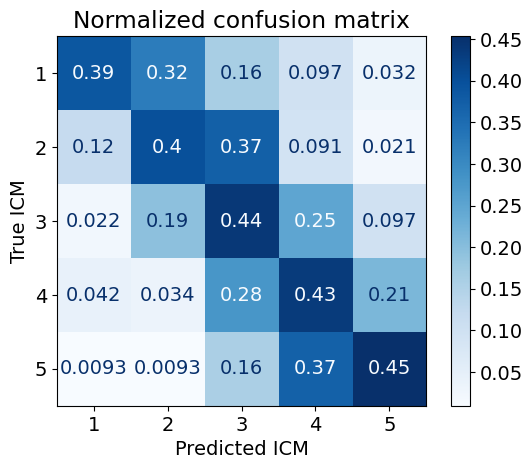

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


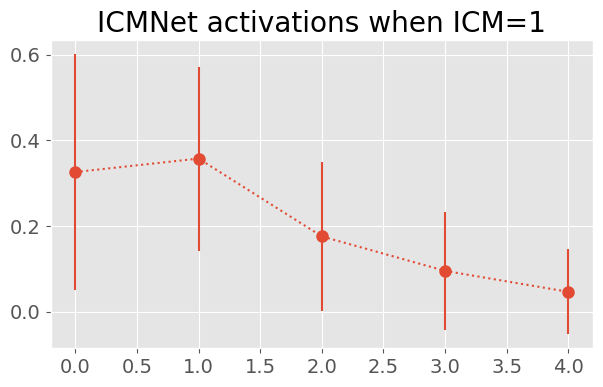

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


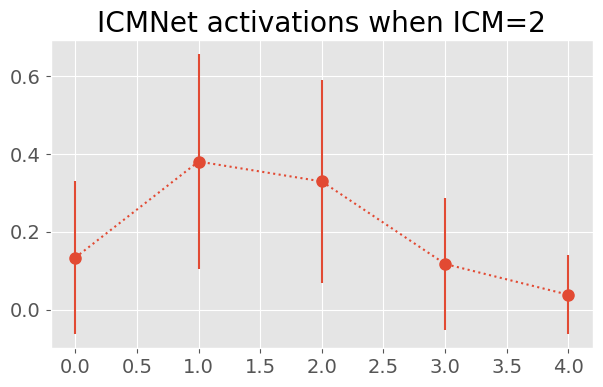

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


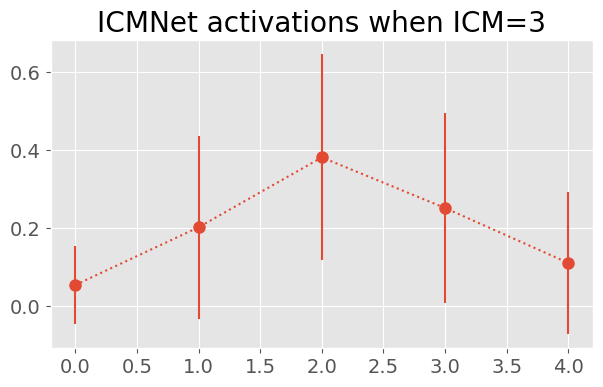

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


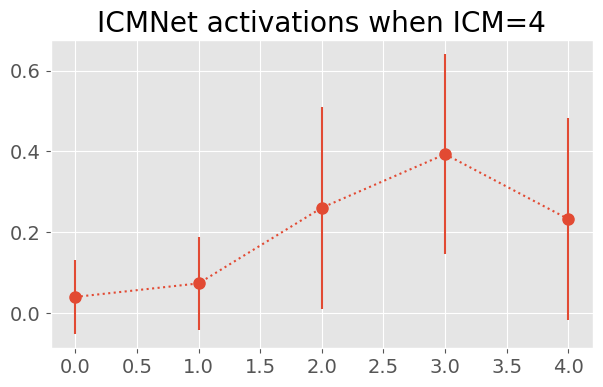

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


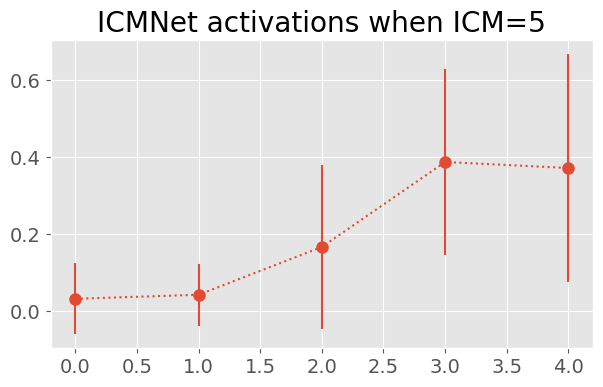

    Testing...
36
MAE (ICM=1) 1.1194029850746268 1.1133167879982995
119
MAE (ICM=2) 0.6412213740458015 0.715890544429956
246
MAE (ICM=3) 0.6998050682261209 0.6721557366572808
310
MAE (ICM=4) 0.6561954624781849 0.6726656437277454
101
MAE (ICM=5) 0.7320574162679426 0.8155052894286753

Accuracy: 0.4445812807881773
Balanced_Accuracy: 0.43876689464660823
Kappa: 0.25142474019443506
F1: 0.44564571772740547
Top-2:  0.7758620689655172
Top-3:  0.9396551724137931
[[ 11  15   5   3   2]
 [  6  70  30  12   1]
 [  7  42  99  75  23]
 [  3  14  77 134  82]
 [  1   2  11  40  47]]
              precision    recall  f1-score   support

           0       0.39      0.31      0.34        36
           1       0.49      0.59      0.53       119
           2       0.45      0.40      0.42       246
           3       0.51      0.43      0.47       310
           4       0.30      0.47      0.37       101

    accuracy                           0.44       812
   macro avg       0.43      0.44      0.43    

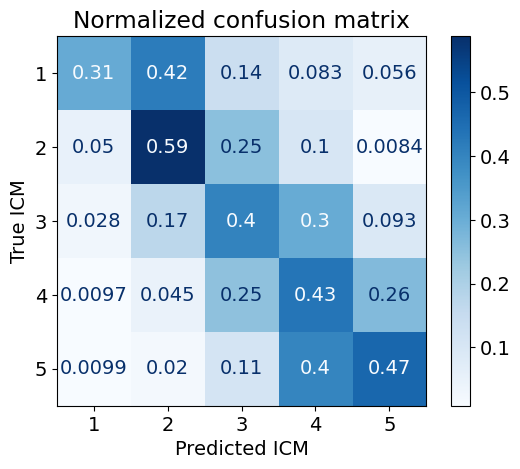

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


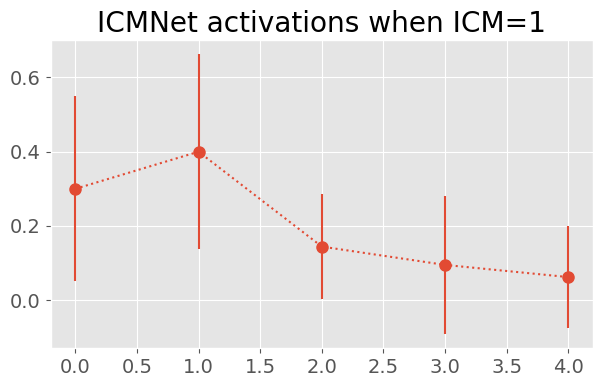

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


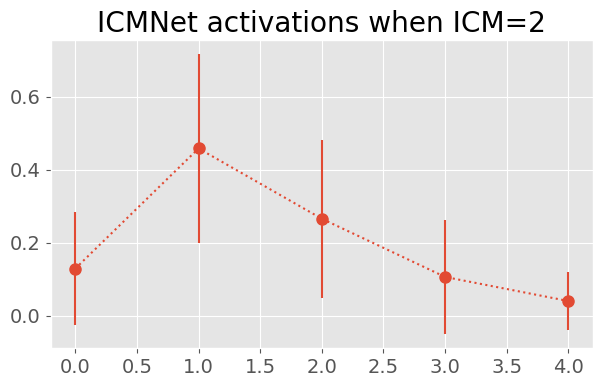

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


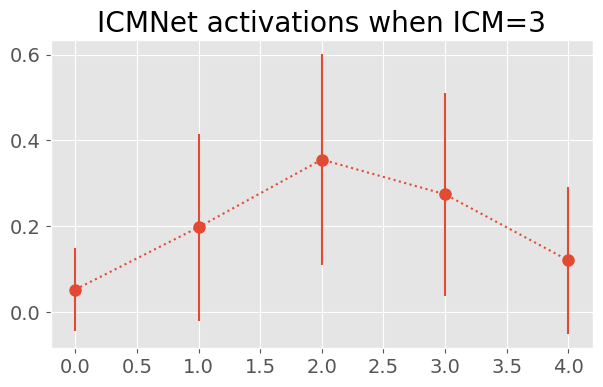

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


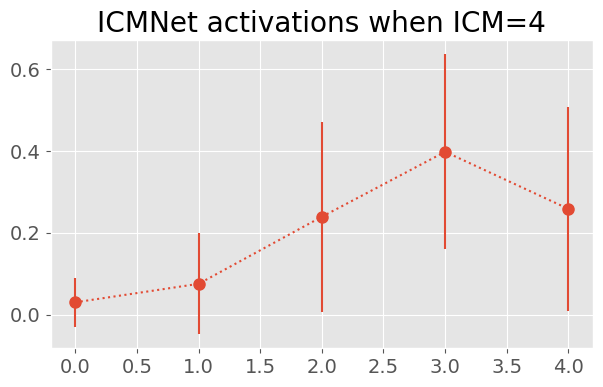

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


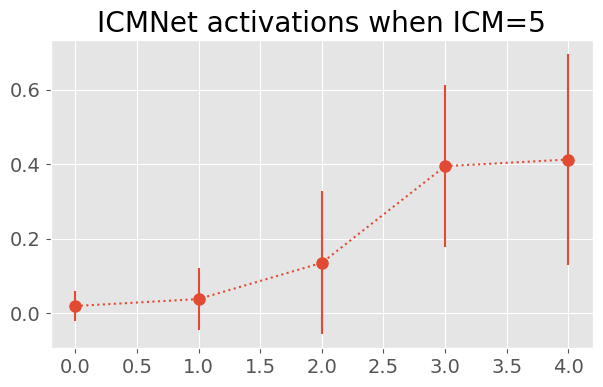

    Testing...
24
MAE (ICM=1) 1.1428571428571428 1.1912817787136398
133
MAE (ICM=2) 0.6683544303797468 0.6963820251930812
265
MAE (ICM=3) 0.6606683804627249 0.6575803316699615
270
MAE (ICM=4) 0.5919335705812574 0.6531474560794822
120
MAE (ICM=5) 0.7811550151975684 0.7955865361207483

Accuracy: 0.47783251231527096
Balanced_Accuracy: 0.44092434965821264
Kappa: 0.2776725264719272
F1: 0.4741914739134262
Top-2:  0.7647783251231527
Top-3:  0.9322660098522167
[[ 10   7   2   2   3]
 [ 13  52  53  15   0]
 [  9  37 129  80  10]
 [  2   7  73 158  30]
 [  1   1  18  61  39]]
              precision    recall  f1-score   support

           0       0.29      0.42      0.34        24
           1       0.50      0.39      0.44       133
           2       0.47      0.49      0.48       265
           3       0.50      0.59      0.54       270
           4       0.48      0.33      0.39       120

    accuracy                           0.48       812
   macro avg       0.45      0.44      0.44    

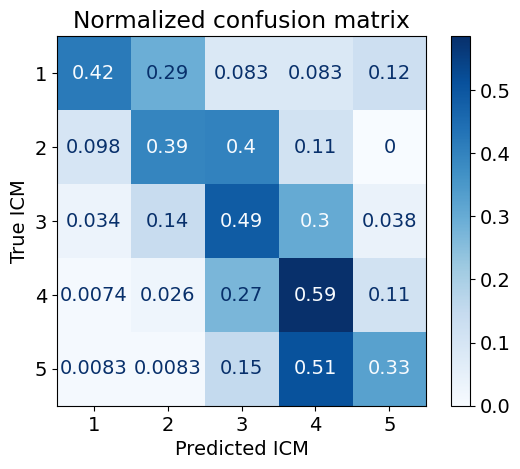

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


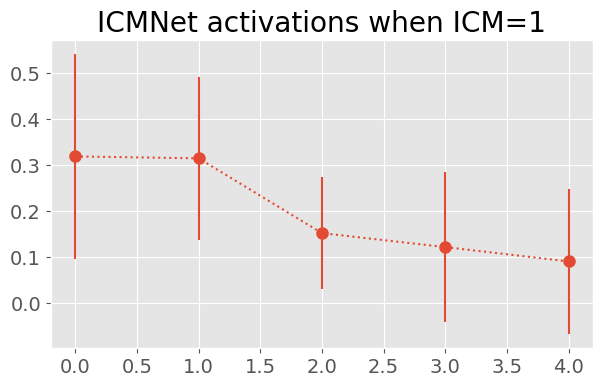

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


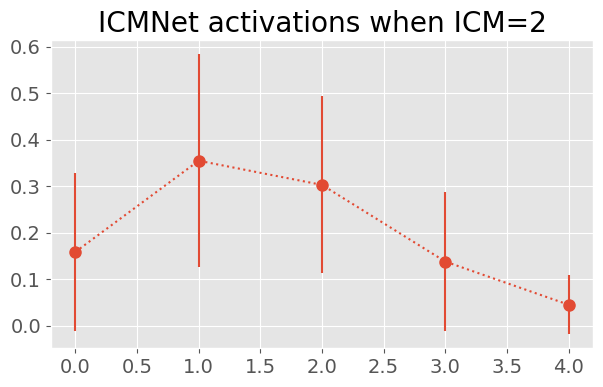

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


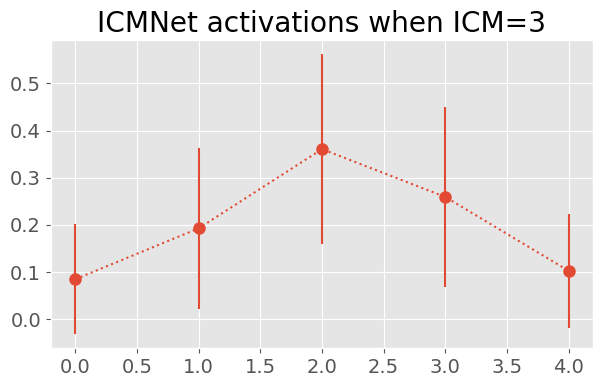

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


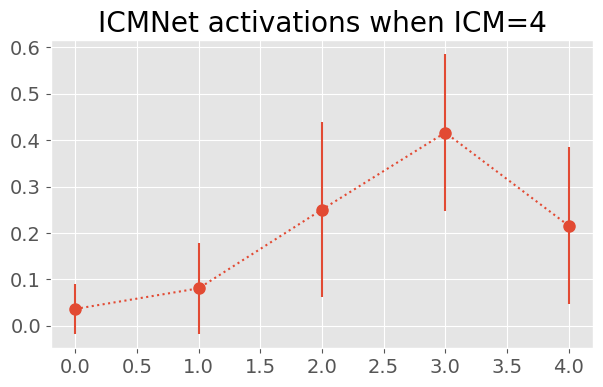

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


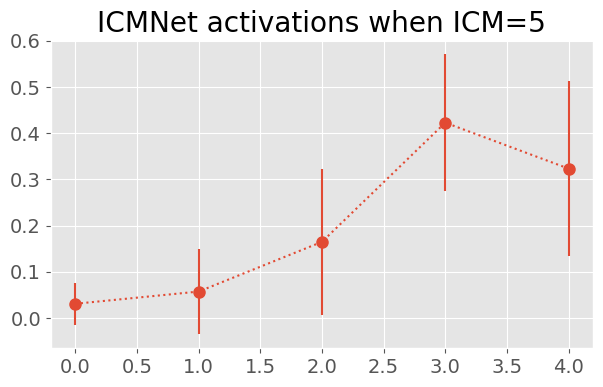

    Testing...
28
MAE (ICM=1) 1.1428571428571428 1.224989893875063
152
MAE (ICM=2) 0.7074954296160878 0.6989143693493151
246
MAE (ICM=3) 0.6630859375 0.6545846790062735
276
MAE (ICM=4) 0.5781948168007149 0.6596421386962954
110
MAE (ICM=5) 0.8018223234624146 0.8124298352619496

Accuracy: 0.4445812807881773
Balanced_Accuracy: 0.43470743884680363
Kappa: 0.2464618613551719
F1: 0.44458503396226445
Top-2:  0.7549261083743842
Top-3:  0.9150246305418719
[[ 14   4   3   6   1]
 [ 22  53  54  22   1]
 [ 10  26 105  91  14]
 [  7   8  54 150  57]
 [  3   1  13  54  39]]
              precision    recall  f1-score   support

           0       0.25      0.50      0.33        28
           1       0.58      0.35      0.43       152
           2       0.46      0.43      0.44       246
           3       0.46      0.54      0.50       276
           4       0.35      0.35      0.35       110

    accuracy                           0.44       812
   macro avg       0.42      0.43      0.41       812


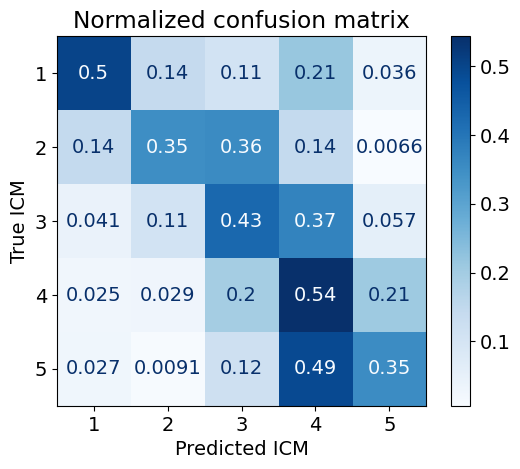

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


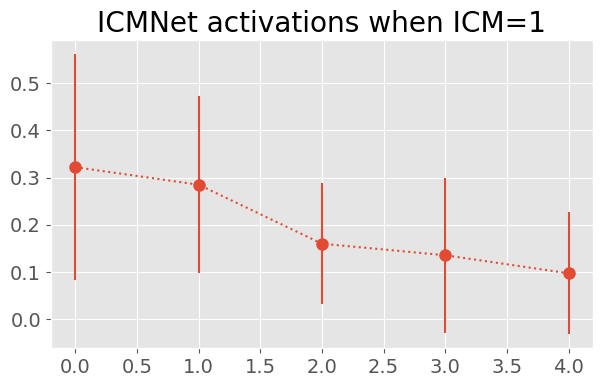

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


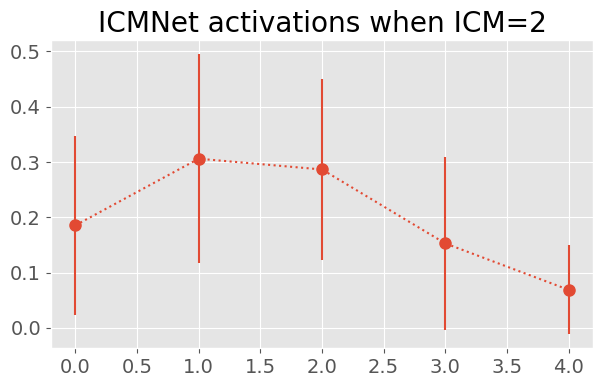

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


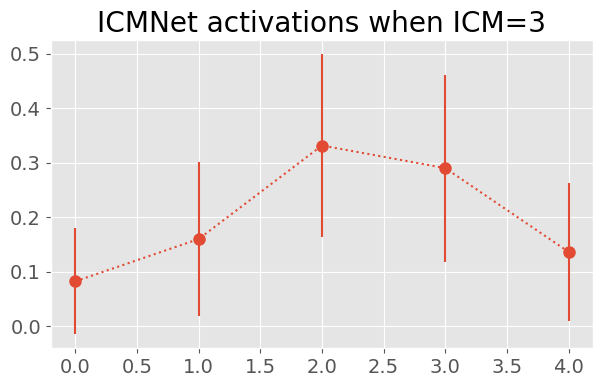

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


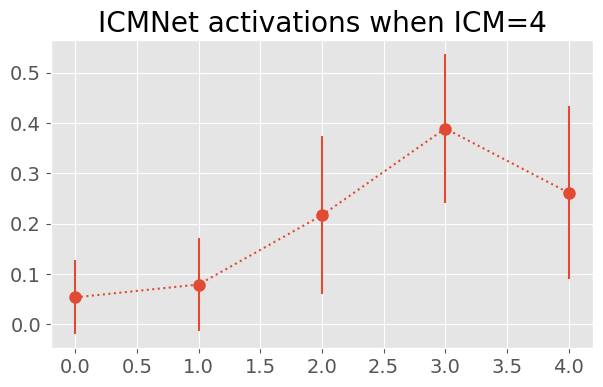

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


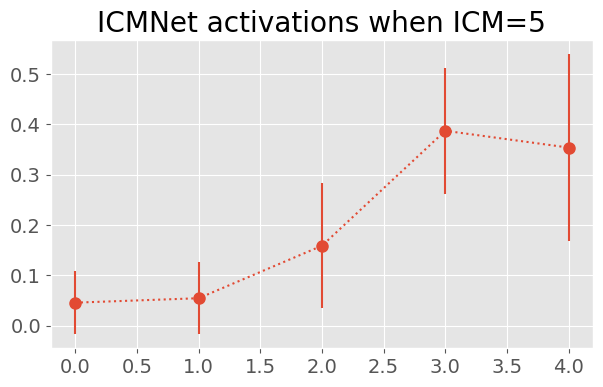

    Testing...
25
MAE (ICM=1) 1.1319444444444444 1.237417380955738
129
MAE (ICM=2) 0.7248520710059172 0.7183380774409972
263
MAE (ICM=3) 0.6449106449106449 0.6517707425128693
283
MAE (ICM=4) 0.5841654778887304 0.6512188033380659
112
MAE (ICM=5) 0.809437386569873 0.8116561518737333

Accuracy: 0.4544334975369458
Balanced_Accuracy: 0.44571263147363627
Kappa: 0.25381735207177303
F1: 0.45505119901345814
Top-2:  0.770935960591133
Top-3:  0.916256157635468
[[ 12   6   1   5   1]
 [ 14  52  41  18   4]
 [  5  37 133  72  16]
 [  2  14  77 129  61]
 [  1   1  20  47  43]]
              precision    recall  f1-score   support

           0       0.35      0.48      0.41        25
           1       0.47      0.40      0.44       129
           2       0.49      0.51      0.50       263
           3       0.48      0.46      0.47       283
           4       0.34      0.38      0.36       112

    accuracy                           0.45       812
   macro avg       0.43      0.45      0.43       

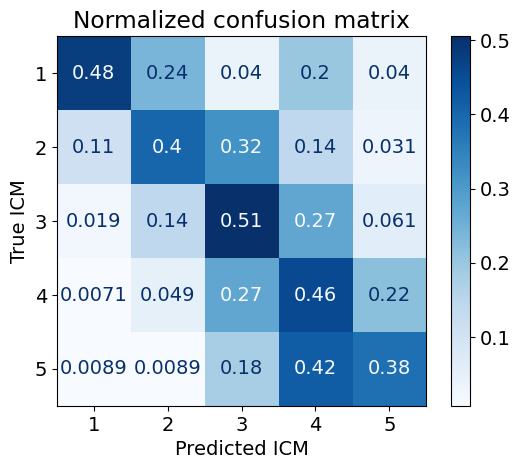

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


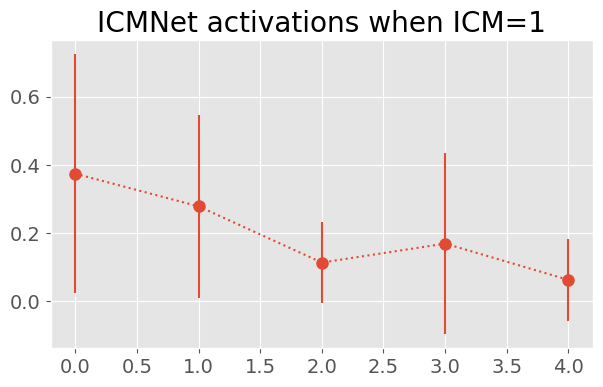

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


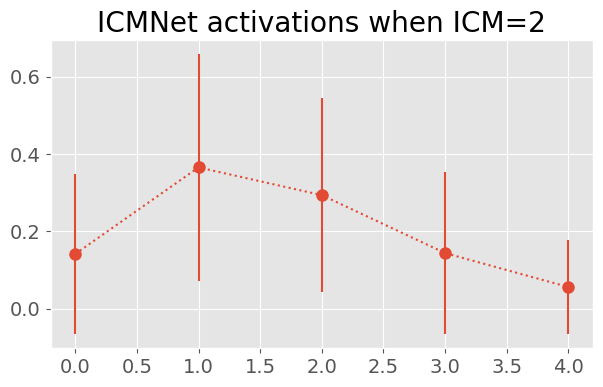

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


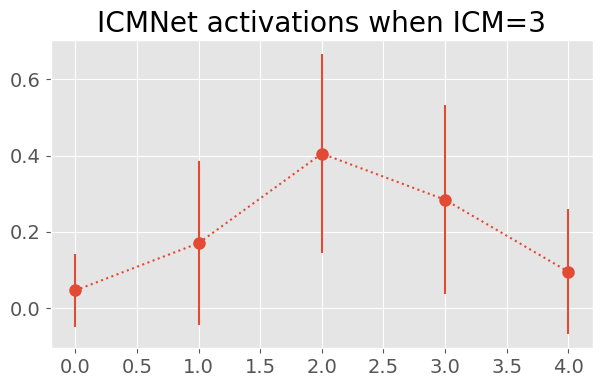

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


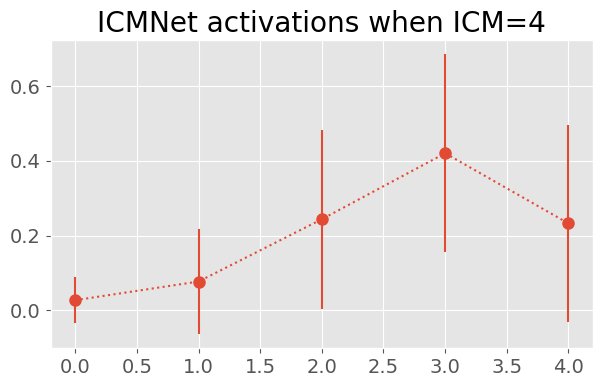

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


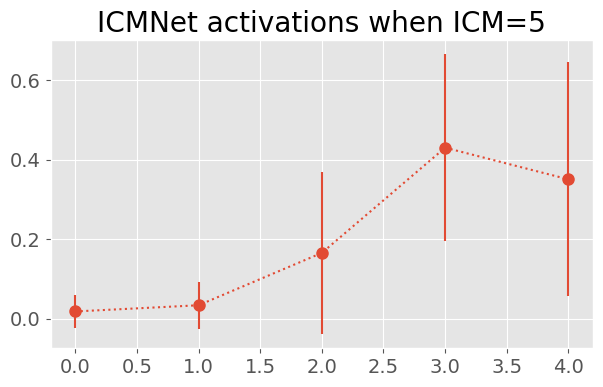

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import normalize
import pandas as pd
import torch
import torch.nn.functional as tf
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update({'font.size': 22})

torch.manual_seed(0)
torch.use_deterministic_algorithms(True)
mae = [[],[],[],[],[]]

for fold, val_loader in enumerate(val_loaders):

    model.load_state_dict(torch.load(f'best_fold0{fold+1}.pt'))
    model.to(device)
    model.eval()
    
#     test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
#     val_loader = torch.utils.data.DataLoader(
#                       dataset,
#                       batch_size=16, 
#                       num_workers=8,
#                       sampler=test_subsampler)
    
    print('    Testing...')
    losses, correct = [], 0.
    val_pred, val_score, val_labels = [], [], []
    with torch.no_grad():
        for it, data in enumerate(val_loader):
            inps, labs = data

            inps = inps.to(device)
            labs = labs.to(device)
            output = model(inps)
            _, preds = torch.max(output, 1)
            val_labels += labs.cpu().numpy().tolist()
            val_pred += output.max(1)[1].cpu().numpy().tolist()
            val_score += output.detach().cpu().numpy().tolist()
            correct += torch.sum(preds == labs.data)
#             errors += torch.abs(preds - labs.data)

            loss = criterion(output, labs)
            losses.append(loss.data.item())    

    
    for clas in range(5):
        idx = [k for k, v in enumerate(val_labels) if v == clas]
        print(len(idx))
        mae[clas].extend(np.abs(np.array(val_pred)[idx] - np.array(val_labels)[idx]))
        print(f'MAE (ICM={clas+1})', np.mean(mae[clas]), np.std(mae[clas]))
    
#     print(f'Loss: {np.mean(losses)}, Acc: {correct/len(test_ids)}', 'MAE: ', np.mean(mae), np.std(mae))
#     print(np.histogram(val_labels, bins=5))
    calculate_metrics(val_pred, val_labels, val_score)
    
    ########## Figures ###############
    plt.style.use('default')
    plt.rcParams.update({'font.size': 14})
    cm = confusion_matrix(val_labels, val_pred)
    cm_val = normalize(cm, axis=1, norm='l1')

    disp = ConfusionMatrixDisplay(cm_val)
    disp.plot(cmap='Blues')

    plt.title('Normalized confusion matrix')
    plt.xticks(np.arange(5), np.arange(1,6))
    plt.yticks(np.arange(5), np.arange(1,6))
    plt.ylabel('True ICM')
    plt.xlabel('Predicted ICM')
    plt.savefig(f'cm_fold0{fold+1}.pdf', bbox_inches='tight', format='pdf', dpi=150)
    plt.show()
    
    plt.style.use('ggplot')
    plt.rcParams.update({'font.size': 14})
    for k in range(5):
        idx = [i for i, v in enumerate(val_labels) if v == k]
        scores = tf.softmax(torch.Tensor(val_score))[idx]

        df = pd.DataFrame(scores.numpy())
        fig, ax = plt.subplots(figsize=(7, 4))
        ax.errorbar(np.arange(5), df.mean(), yerr=df.std(), 
                linestyle='dotted', marker='o', markersize=8)

        plt.title(f'ICMNet activations when ICM={k+1}')
        plt.savefig(f'activations_fold0{fold+1}_ICM0{k+1}.pdf', bbox_inches='tight', format='pdf', dpi=150)
        plt.show()


# Test

In [12]:
from torchvision import models
from torch import nn
import torch

model = models.efficientnet_v2_s(pretrained=False)
num_ftrs = model.classifier[1].in_features
model.classifier = nn.Sequential(
                            nn.Dropout(p=0.2, inplace=True),
                            nn.Linear(in_features=num_ftrs, out_features=5, bias=True))

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
    
results = {'filename': [],  'idx': [], 'label': [], 'pred': [], 'error': []}
for fold, test_ids in enumerate(folds['test']):
    model.load_state_dict(torch.load(f'best_fold0{fold+1}.pt'))
    model.to(device)
    model.eval()
    
    error = []
    
    for k, idx in enumerate(test_ids):
        print(f'\r{k}/{len(test_ids)}', flush=True, end='')
        img, lab = dataset[idx]
        
        img = img.to(device)
        out = model(img[None])
        
        pred = out.max(1)[1].cpu().numpy().tolist()
        error += [np.abs(lab - pred[0])]
        results['filename'].append(dataset.imgs[idx][0])
        results['idx'].append(idx)
        results['label'].append(dataset.imgs[idx][1])
        results['pred'].append(pred[0])
        results['error'].append(error[-1])
        

    print('')
        

811/812
811/812
811/812
811/812
811/812


In [28]:
df = pd.DataFrame(results)
df['fold'] = np.repeat(np.arange(5), 812).tolist()
display(df)
df.to_csv('inferencias_5classes.csv')



,filename,idx,label,pred,error,fold
0,/mnt/DADOS_PARIS_1/laranjeira/Datasets/ICM_fac...,1,0,0,0,0
1,/mnt/DADOS_PARIS_1/laranjeira/Datasets/ICM_fac...,6,0,1,1,0
2,/mnt/DADOS_PARIS_1/laranjeira/Datasets/ICM_fac...,7,0,1,1,0
3,/mnt/DADOS_PARIS_1/laranjeira/Datasets/ICM_fac...,8,0,1,1,0
4,/mnt/DADOS_PARIS_1/laranjeira/Datasets/ICM_fac...,12,0,2,2,0
...,...,...,...,...,...,...
4055,/mnt/DADOS_PARIS_1/laranjeira/Datasets/ICM_fac...,4032,4,2,2,4
4056,/mnt/DADOS_PARIS_1/laranjeira/Datasets/ICM_fac...,4036,4,4,0,4
4057,/mnt/DADOS_PARIS_1/laranjeira/Datasets/ICM_fac...,4045,4,2,2,4
4058,/mnt/DADOS_PARIS_1/laranjeira/Datasets/ICM_fac...,4046,4,3,1,4


In [184]:
import pandas as pd
df = pd.DataFrame(results)

sub = df[df['label'] == 0]
print(sub[sub['error'] == 0].iloc[1]['filename'])
print(sub[sub['error'] == 1].iloc[0]['filename'])
print(sub[sub['error'] >  1].iloc[0]['filename'])

/mnt/DADOS_PARIS_1/laranjeira/Datasets/ICM_facade/0/03_05_2022_3AA6.tmp.jpg


IndexError: single positional indexer is out-of-bounds

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  0%|          | 0/10 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


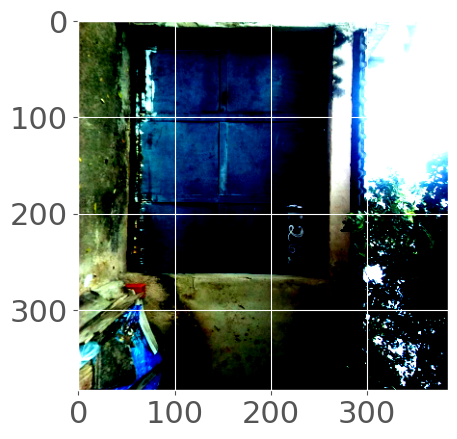

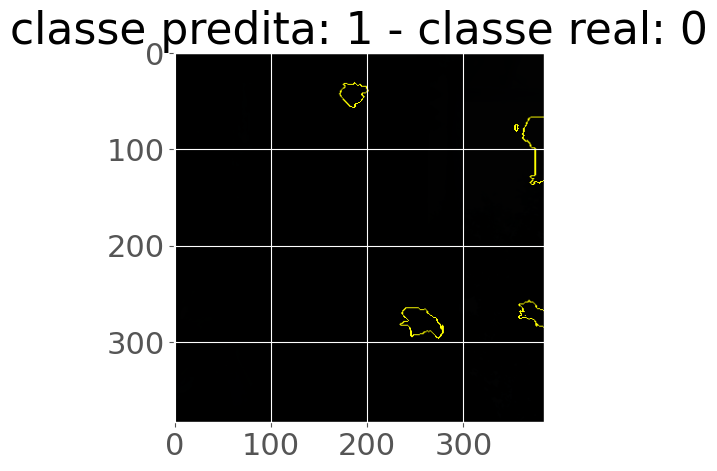

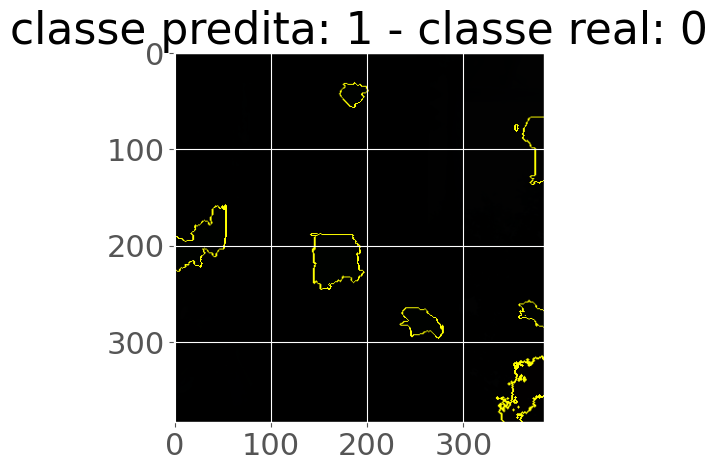

In [206]:
from lime import lime_image
from skimage.segmentation import mark_boundaries

model.load_state_dict(torch.load(f'best_fold0{fold+1}.pt'))
    
def batch_predict(img):
    model.to(device)
    model.eval()

    img = torch.from_numpy(img).permute(0,3,1,2)
    img = img.to(device)
    logits = model(img)
    probs = F.softmax(logits, dim=1)
    return probs.detach().cpu().numpy()


idx = 0
img, lab = dataset[idx]
plt.figure()
plt.imshow(img.permute(1,2,0).cpu().numpy())

img = img.to(device)
model.to(device)
logits = model(img[None])
probs = F.softmax(logits, dim=1).cpu()
probs1 = probs.topk(1)

classe_pred = np.argmax(probs.detach().numpy()) + 1
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(img.permute(1,2,0).cpu().numpy(), 
                                         batch_predict, # classification function
                                         top_labels=1, 
                                         hide_color=0, 
                                         num_samples=10) # number of images that will be sent to classification function
model.to('cpu')
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
img_boundry1 = mark_boundaries(temp/255.0, mask)
plt.figure()
plt.title('classe predita: ' + str(classe_pred) + ' - classe real: ' + str(lab))
plt.imshow(img_boundry1)
# plt.savefig('/mnt/DADOS_PARIS_1/joaopedro/fachadas2/lime_images/'+img_path+'_lime.jpg')


temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
img_boundry2 = mark_boundaries(temp/255.0, mask)
plt.figure()
plt.title('classe predita: ' + str(classe_pred) + ' - classe real: ' + str(lab))
plt.imshow(img_boundry2)
# plt.savefig('/mnt/DADOS_PARIS_1/joaopedro/fachadas2/lime_images/'+img_path+'_lime2.jpg')

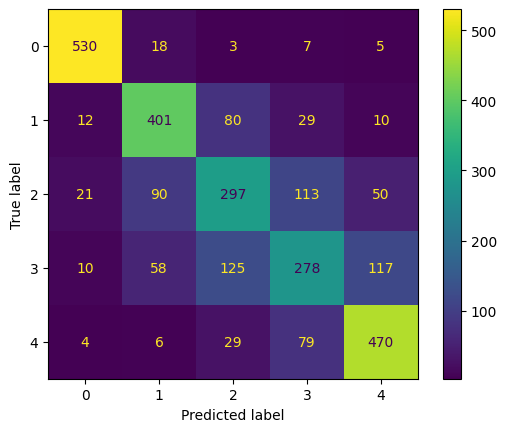

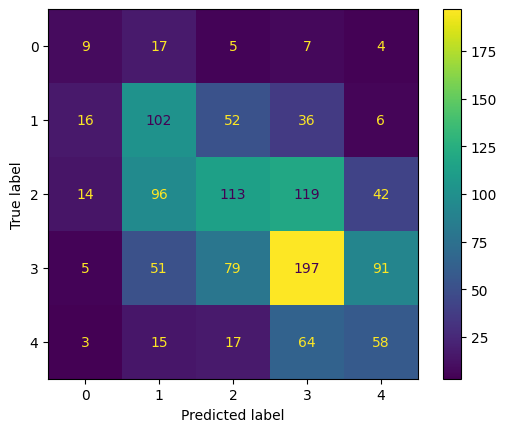

In [17]:
### With focal Loss and DataLoader sampler
# Starting epoch 11/100...
# 355/356ining...
# Loss: 0.21463200990947778, Acc: 0.6988036632537842
# (array([535, 562, 570, 591, 584]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))

# Accuracy: 0.6988036593947924
# Balanced_Accuracy: 0.7030644933396435
# Kappa: 0.6234617898578775
# F1: 0.6937694610423244
# Top-2:  0.8884588318085855
# Top-3:  0.9707952146375791
# [[508  14   8   4   1]
#  [ 19 423  69  30  21]
#  [ 14  90 300 110  56]
#  [ 11  45 104 296 135]
#  [  2  14  32  77 459]]
#               precision    recall  f1-score   support

#            0       0.92      0.95      0.93       535
#            1       0.72      0.75      0.74       562
#            2       0.58      0.53      0.55       570
#            3       0.57      0.50      0.53       591
#            4       0.68      0.79      0.73       584

#     accuracy                           0.70      2842
#    macro avg       0.70      0.70      0.70      2842
# weighted avg       0.69      0.70      0.69      2842

#     Testing...
# Loss: 0.7987646685516248, Acc: 0.3932676613330841
# (array([ 42, 212, 384, 423, 157]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]))

# Accuracy: 0.39326765188834156
# Balanced_Accuracy: 0.36496728297444553
# Kappa: 0.18862070333204728
# F1: 0.3921214076249925
# Top-2:  0.7118226600985221
# Top-3:  0.9039408866995073
# [[  9  17   5   7   4]
#  [ 16 102  52  36   6]
#  [ 14  96 113 119  42]
#  [  5  51  79 197  91]
#  [  3  15  17  64  58]]
#               precision    recall  f1-score   support

#            0       0.19      0.21      0.20        42
#            1       0.36      0.48      0.41       212
#            2       0.42      0.29      0.35       384
#            3       0.47      0.47      0.47       423
#            4       0.29      0.37      0.32       157

#     accuracy                           0.39      1218
#    macro avg       0.35      0.36      0.35      1218
# weighted avg       0.40      0.39      0.39      1218

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline

cm_train = [[530,  18,   3,   7,   5],
            [ 12, 401,  80,  29,  10],
            [ 21,  90, 297, 113,  50],
            [ 10,  58, 125, 278, 117],
            [  4,   6,  29,  79, 470]]

cm_val = [[  9,  17,   5,   7,   4],
 [ 16, 102,  52,  36,   6],
 [ 14,  96, 113, 119,  42],
 [  5,  51,  79, 197,  91],
 [  3,  15,  17,  64,  58]]

disp = ConfusionMatrixDisplay(np.asarray(cm_train))
disp.plot()
plt.show()


disp = ConfusionMatrixDisplay(np.asarray(cm_val))
disp.plot()
plt.show()

##############################################
Starting epoch 1/10...
355/356ining...
Loss: 0.8951880186796188, Acc: 0.3240675628185272
    Testing...
Loss: 0.8881389358004586, Acc: 0.3136289119720459
##############################################
Starting epoch 2/10...
355/356ining...
Loss: 0.6663516440083471, Acc: 0.421182245016098
    Testing...
Loss: 0.7559636430173624, Acc: 0.3817734122276306
##############################################
Starting epoch 3/10...
355/356ining...
Loss: 0.5397990182711837, Acc: 0.48838844895362854
    Testing...
Loss: 0.8060617416608529, Acc: 0.32266008853912354
##############################################
Starting epoch 4/10...
355/356ining...
Loss: 0.44083763575286006, Acc: 0.5503166913986206
    Testing...
Loss: 0.7873744098133728, Acc: 0.3456486165523529
##############################################
Starting epoch 5/10...
355/356ining...
Loss: 0.3998786054467887, Acc: 0.552075982093811
    Testing...
Loss: 0.7288650863971866, Acc: 0.3768472969532013
##############################################
Starting epoch 6/10...
355/356ining...
Loss: 0.33488817508803326, Acc: 0.6066150665283203
    Testing...
Loss: 0.825528112029443, Acc: 0.34729063510894775
##############################################
Starting epoch 7/10...
355/356ining...
Loss: 0.31189156896068476, Acc: 0.6206896305084229
    Testing...
Loss: 0.7749666783653322, Acc: 0.380952388048172
##############################################
Starting epoch 8/10...
355/356ining...
Loss: 0.28579593858985086, Acc: 0.6425052881240845
    Testing...
Loss: 0.7803233592847332, Acc: 0.38752052187919617
##############################################
Starting epoch 9/10...
355/356ining...
Loss: 0.24125913046091124, Acc: 0.6688951253890991
    Testing...
Loss: 0.7992135753641363, Acc: 0.38752052187919617
##############################################
Starting epoch 10/10...
355/356ining...
Loss: 0.23388922341910892, Acc: 0.6861364841461182
    Testing...
Loss: 0.7977265183310039, Acc: 0.3686371147632599

In [ ]:
[[ 21  11   5   5   3]
 [ 23  95  57  23   7]
 [ 26  65 164  91  21]
 [ 12  22 117 188  94]
 [  4   3  25  70  66]]

[[  8  25   5   2   2]
 [ 11  84  65  20  12]
 [  9  67 159  99  61]
 [  5  18  92 194 129]
 [  0   3  14  63  71]]


[[  3  18   5   2   4]
 [  8  75  86  29   8]
 [  5  56 154 123  49]
 [  0  18 102 190 102]
 [  2   7  22  69  81]]

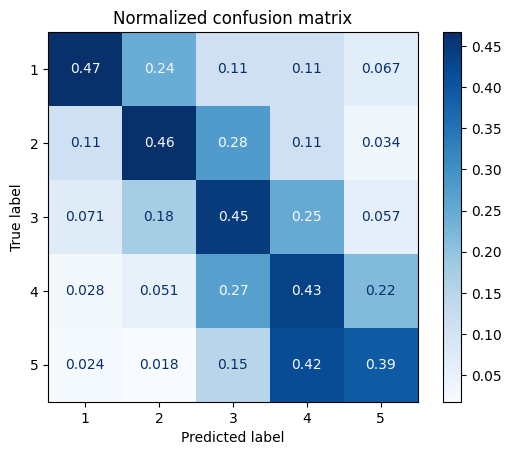

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

cm_val=\
[[ 21,  11,   5,   5,   3],
 [ 23,  95,  57,  23,   7],
 [ 26,  65, 164,  91,  21],
 [ 12,  22, 117, 188,  94],
 [  4,   3,  25,  70,  66]]


cm_val = np.asarray(cm_val)
cm_val = normalize(cm_val, axis=1, norm='l1')

disp = ConfusionMatrixDisplay(cm_val)
disp.plot(cmap='Blues')

plt.title('Normalized confusion matrix')
plt.xticks(np.arange(5), np.arange(1,6))
plt.yticks(np.arange(5), np.arange(1,6))
plt.show()

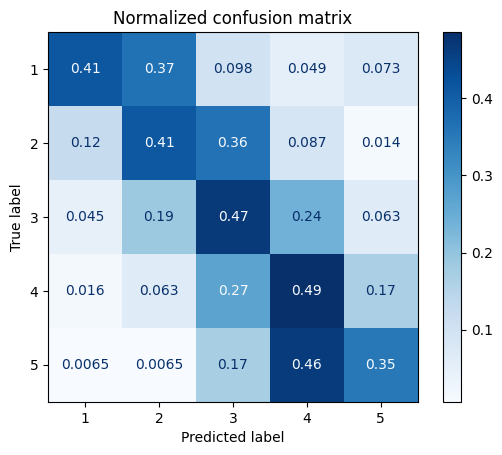

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

cm_val=\
[[ 17,  15,   4,   2,   3,],
 [ 27,  90,  79,  19,   3],
 [ 17,  71, 176,  90,  24],
 [  7,  27, 115, 208,  71],
 [  1,   1,  26,  71,  54]]


cm_val = np.asarray(cm_val)
cm_val = normalize(cm_val, axis=1, norm='l1')

disp = ConfusionMatrixDisplay(cm_val)
disp.plot(cmap='Blues')

plt.title('Normalized confusion matrix')
plt.xticks(np.arange(5), np.arange(1,6))
plt.yticks(np.arange(5), np.arange(1,6))
plt.show()



In [ ]:
val_pred, val_labels, val_score

(array([534., 528., 122.,  34.]),
 array([0., 1., 2., 3., 4.]),
 <BarContainer object of 4 artists>)

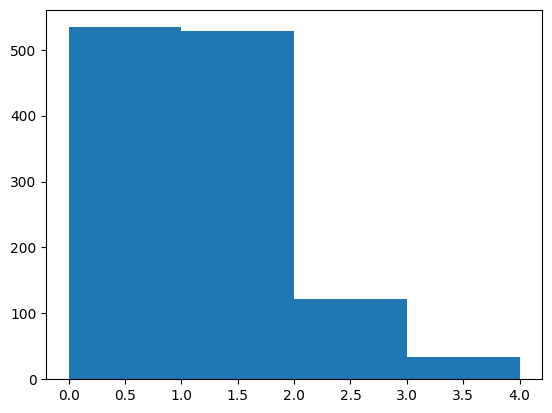

In [90]:
val_pred = np.asarray(val_pred) 
val_labels = np.array(val_labels)

plt.hist(np.abs(val_pred-val_labels), bins=4)

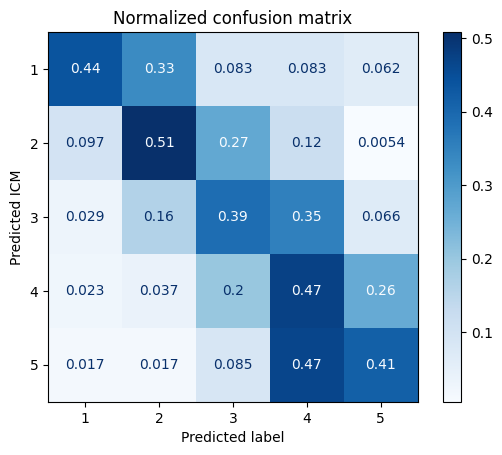

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


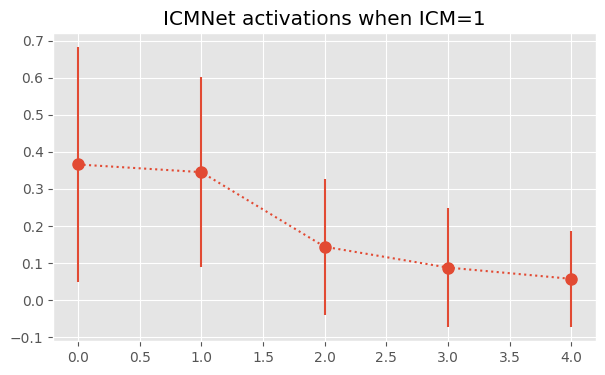

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


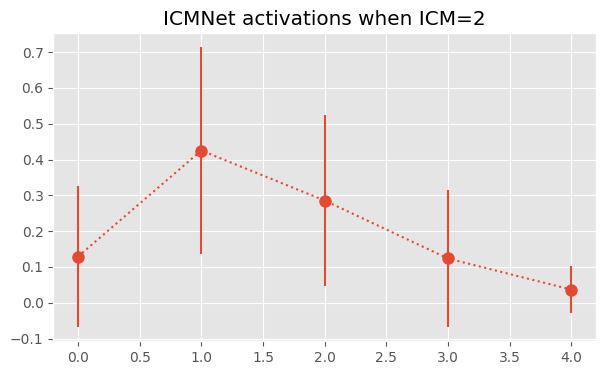

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


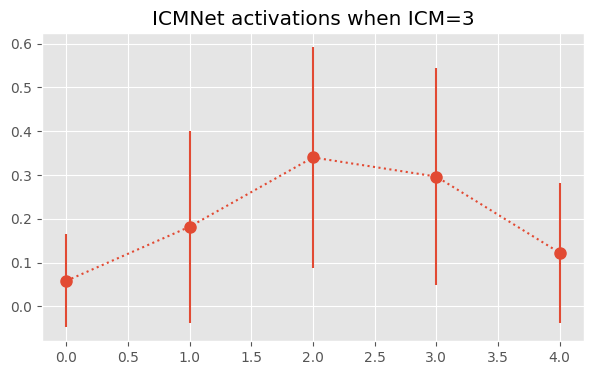

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


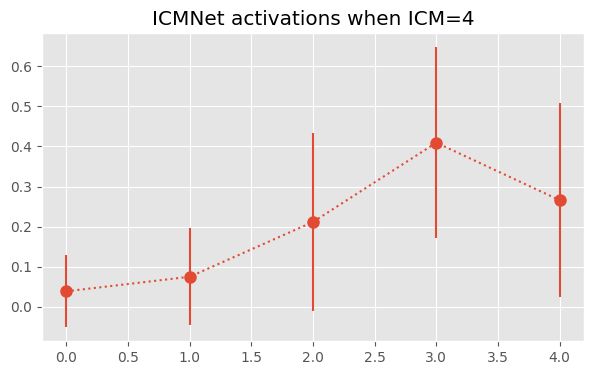

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


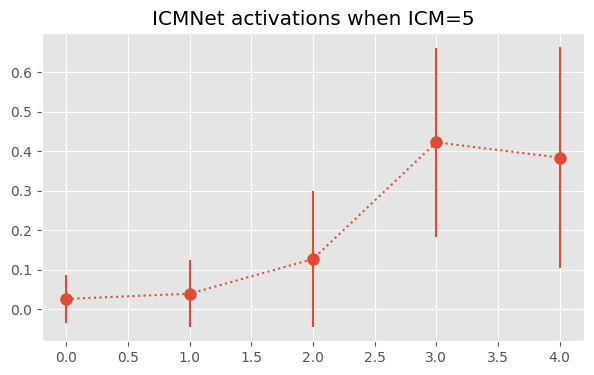

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import normalize
import pandas as pd
import torch.nn.functional as tf
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

val_pred   = best['val_pred']
val_score  = best['val_score'] 
val_labels = best['val_labels'] 

cm = confusion_matrix(val_labels, val_pred)
cm_val = normalize(cm, axis=1, norm='l1')

disp = ConfusionMatrixDisplay(cm_val)
disp.plot(cmap='Blues')

plt.title('Normalized confusion matrix')
plt.xticks(np.arange(5), np.arange(1,6))
plt.yticks(np.arange(5), np.arange(1,6))
plt.ylabel('True ICM')
plt.ylabel('Predicted ICM')
plt.savefig('cm.pdf', bbox_inches='tight', format='pdf', dpi=150)
plt.show()


plt.style.use('ggplot')

for k in range(5):
    idx = [i for i, v in enumerate(val_labels) if v == k]
    scores = tf.softmax(torch.Tensor(val_score))[idx]

    df = pd.DataFrame(scores.numpy())
    fig, ax = plt.subplots(figsize=(7, 4))
    ax.errorbar(np.arange(5), df.mean(), yerr=df.std(), 
            linestyle='dotted', marker='o', markersize=8)
    
#     ax.boxplot(df.to_numpy(), vert=True, notch=True)

    
    plt.title(f'ICMNet activations when ICM={k+1}')
    plt.savefig(f'activations_0{k+1}.pdf', bbox_inches='tight', format='pdf', dpi=150)
    plt.show()
    

<ErrorbarContainer object of 3 artists>

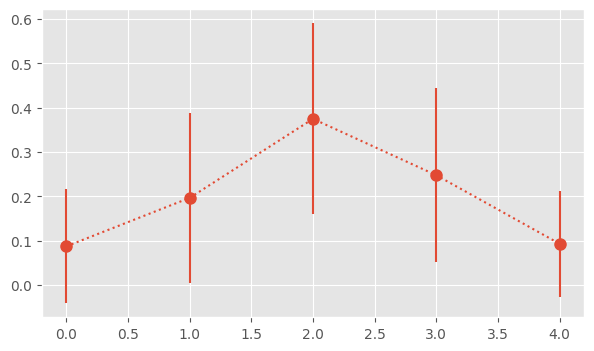

In [53]:
fig, ax = plt.subplots(figsize=(7, 4))

# standard error bars
ax.errorbar(np.arange(5), df.mean(), yerr=df.std(), 
            linestyle='dotted', marker='o', markersize=8)

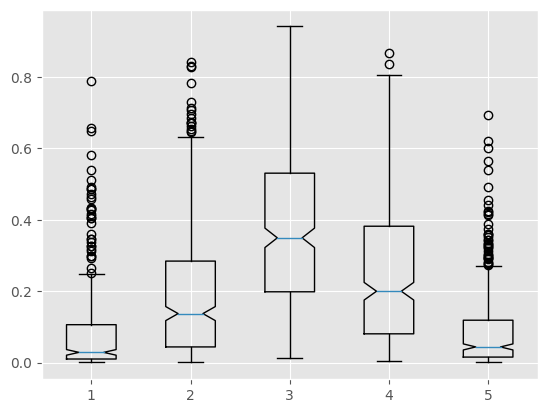

In [54]:
plt.boxplot(df.to_numpy(), vert=True, notch=True)
plt.show()

# Lime explain

In [ ]:
from lime import lime_image
from PIL import Image

def get_pil_transform(): 
    transf = transforms.Compose([
        transforms.Resize((512, 512)),
        transforms.CenterCrop(512)
    ])    
    return transf

with open(os.path.abspath(path), 'rb') as f:
    with Image.open(f) as im:
        img = im.convert('RGB') 


img_t = get_input_tensors(img)
logits = model(img_t)
probs = F.softmax(logits, dim=1)
probs1 = probs.topk(1)
classe_pred = np.argmax(probs.detach().numpy()) + 1
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(np.array(get_pil_transform(img)), 
                                         batch_predict, # classification function
                                         top_labels=1, 
                                         hide_color=0, 
                                         num_samples=10) # number of images that will be sent to classification function
model.to('cpu')
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
img_boundry1 = mark_boundaries(temp/255.0, mask)
plt.title('classe predita: ' + str(classe_pred) + ' - classe real: ' + str(label))
plt.imshow(img_boundry1)